<h1>Problem Statement: </h1>

The heart disease remains a significant public health concern worldwide today. Early and accurate prediction of heart disease risk can help the patient to take the quick action towards it. While various risk assessment models exist, there is a need for more sophisticated and precise predictive methods that can leverage the power of machine learning algorithms to enhance accuracy and reliability in predicting individuals at risk of heart disease by taking the use of previous medical records of patients with heart diseases or not with hear disease. The aim of this project is not to eliminate the job of doctors but to give a tool that might be accessible to every person around the world that can use it in early prediction of disease and get the right time diagnosis of the disease.

<h2>Project title: Predicting likelihood of heart disease using machine learning approaches.</h2>

<h1>Dataset Description:</h1>

The data set that has used in this project has taken from the UC Irvine Machine Learning Repository. This dataset is originally 76 features but all published experiments refer to using a subset of 14 of them. You can visit the website via this link: https://archive.ics.uci.edu/dataset/45/heart+disease

The objective of the dataset is to predict whether or not a patient has heart disease or not, based on medical records of paitients who were having or not having this disease.

The given below is a short description of dataset we are going to work on.
                                               
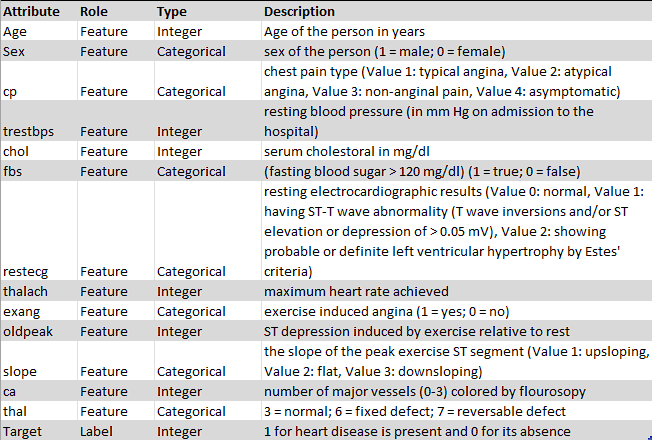

<h2>Importing Frequently Used Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<h2>Reading Dataset</h2>

In [2]:
df=pd.read_csv('heart.csv')

<h2>Exploratory Data Analysis Starts</h2>

Exploratory Data Analysis (EDA) is a crucial initial step in the data analysis process, where the primary goal is to understand the main characteristics, patterns, and relationships present in a dataset. EDA involves using various statistical and visualization techniques to summarize and analyze the data before formal modeling or hypothesis testing takes place. The insights gained from EDA can guide for subsequent analyses and help formulate hypotheses for further investigation.

Some key components and techniques involved in exploratory data analysis:

1. Summary Statistics: Calculating basic descriptive Statistics like mean,meandian,mode,std,quartiles etc.
2. Data Cleaning step: This step includes finding out missing values in the dataset and dealing with those missing data values, it also includes detecting of outliers and duplicates data values and handling of outliers and duplicate data values prsent in the dataset.
3. Data Visualization: Visualizing the data to gain insights about different features present in the dataset, their relationship with each other and with the label column.
4. Univariate Analysis: Analyzing individual variables (features) in isolation can provide insights into their distributions, potential outliers, and other characteristics.
5. Bivariate Analysis: Exploring relationships between pairs of variables helps uncover patterns or correlations that might be important. Scatter plots and correlation matrices are commonly used for bivariate analysis. 
6. Mulivariate Analysis: Investigating interactions among three or more variables can reveal more complex relationships and dependencies. Techniques like heatmaps and parallel coordinate plots can be helpful in this context.

<H2>Step1: Data Understanding Step</H2>

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h3>Interpretation:</h3>

This gives us first five rows of our dataset and we can see that the features our dataset has feature columns as: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']. Our target column is our label column.

In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<h3>Interpretation:</h3>

This gives us first last rows of our dataset and we can see that our dataset has total of 302 rows starting from 0.

In [5]:
df.shape

(303, 14)

<h3>Interpretation:</h3>
    
This means that our dataset has 303 rows starting from zero and 14 columns.

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<h3>Interpretation:</h3>
    
This gives us the names of all the columns that are present in our dataset.

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<h3>Interpretation:</h3>
    
This gives us data type each column present in our dataset. But we know from our data description that columns like 'sex', 'cp', 'trestbps', 'fbs', 'restecg','exang', 'slope', 'thal' are catrgorical columns so we need to change their data types to object.

<h2>Univariate Analysis</h2>

Univariate analysis is a statistical method used to analyze and understand the characteristics and patterns of a single variable in isolation. It involves examining the distribution, central tendency, spread, and other key features of a single variable without considering the relationships between variables. Univariate analysis is an essential step in exploratory data analysis (EDA) and is often the starting point for understanding the basic properties of a dataset.

<h2>Changing data type into Categorical Column</h2>

In [8]:
df=df.astype({"sex":'category',"cp":'category',"trestbps":'category',"fbs":'category',"restecg":'category',"exang":'category',"slope":'category'})

In [9]:
df.dtypes

age            int64
sex         category
cp          category
trestbps    category
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca             int64
thal           int64
target         int64
dtype: object

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
ca,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
thal,303.0,2.313531,0.612277,0.0,2.0,2.0,3.0,3.0
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


<h3>Interpretation:</h3>
    
The above table gives us most of the descriptive statistics like count values of each column, their mean, Standard deviation, minimum value, 1st quartile, 2nd quartile, 3rd quartile and maximum value present in the column. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    category
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    int64   
 12  thal      303 non-null    int64   
 13  target    303 non-null    int64   
dtypes: category(7), float64(1), int64(6)
memory usage: 21.0 KB


<h3>Interpretation:</h3>
    
This gives us info about each column with the non-null values present in each column and the data types of the respective columns.

<H1>Step2: Data Preparation Step</H1>

<h2>Checking Missing Values In Dataset</h2>

In [12]:
missing_value=df.isnull().sum()

In [13]:
missing_percentage=(df.isnull().sum()/len(df))*100

In [14]:
missing_data=pd.concat([missing_value,missing_percentage],axis=1,keys=['Total Missing Values','Missing Percentage'])

In [15]:
missing_data

,Total Missing Values,Missing Percentage
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


<h3>Interpretation:</h3>
    
The above table shows gives us the missing values present in each rows of our dataset and percentage of each rows missing the values. But as we can see that there are no missing values in any of the rows so the missing percentage is also zero. So, we conclude that our data is not missing any values.

<h2>Checking Duplicated Values In Dataset</h2>

In [16]:
df.duplicated().sum()

1

<h3>Interpretation:</h3>
    
This tells us that our dataset has 1 duplicated value present. So, we will drop this duplicated value.

In [17]:
df=df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

<h3>Interpretation:</h3>
    
We can easily tell here that we have dropped our duplicated value.

<h2>Checking for Outliers In Dataset</h2>

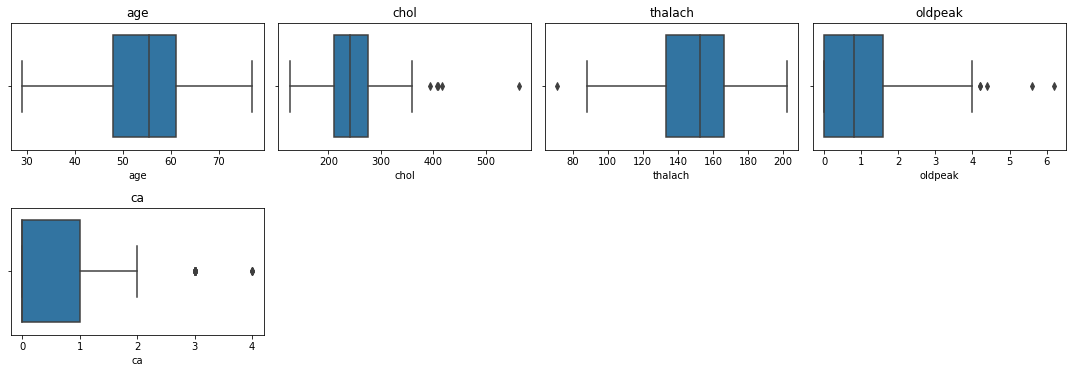

In [19]:
# Assuming df is your DataFrame
feat = ['age', 'chol', 'thalach', 'oldpeak', 'ca']

# Create subplots for each feature
plt.figure(figsize=(15, 10))  # Adjust the figure size if needed
for i, feature in enumerate(feat):
    plt.subplot(4, 4, i + 1)  # Create a 4x4 grid of subplots
    sns.boxplot(data=df, x=feature)
    plt.title(feature)
    
plt.tight_layout()  # Adjust the layout for better spacing between subplots
plt.show()

<h3>Interpretation:</h3>
    
From the above box plot we can see that the columns like 'chol','thalach','oldpeak' and 'ca' have outliers in them. lets handle these outliers carefully.

<h2>Handling the Outliers Using Winsorization Technique</h2>

Winsorization is a data preprocessing technique used to handle outliers in a dataset. Winsorization addresses this issue by capping or "trimming" extreme values to a specified threshold.

Here are the steps involved in Winsorization:

1. Identify Percentiles: The first step is to identify two percentiles: a lower percentile (e.g., 5th percentile) and an upper percentile (e.g., 95th percentile). These percentiles determine the threshold beyond which values are considered outliers.

2. Calculate Percentile Values: Calculate the actual data values corresponding to the lower and upper percentiles. These values define the threshold for identifying outliers.

3. Replace Outliers: Any data point that falls below the lower percentile is considered a low outlier, and any data point that falls above the upper percentile is considered a high outlier. For outliers below the lower percentile, you replace them with the value at the lower percentile. Similarly, for outliers above the upper percentile, you replace them with the value at the upper percentile.

4. Resulting Dataset: The dataset after Winsorization will have fewer extreme values, as they have been replaced by values that are closer to the rest of the data. The distribution of the data will be less skewed by extreme values.

<h2>Winsorization Technique For Handling Outliers</h2>

<h3>1. For df['chol'] Feature Column</h3>

In [20]:
upper_limit=df['chol'].quantile(.95)

In [21]:
upper_limit

326.95

In [22]:
lower_limit=df['chol'].quantile(.05)

In [23]:
lower_limit

175.05

In [24]:
df['chol']=np.where(df['chol']>=upper_limit,
        upper_limit,            
        np.where(df['chol']<=lower_limit,
        lower_limit,
        df['chol']))

<h3>2. For df['thalach'] Feature Column</h3>

In [25]:
lower_limit1=df['thalach'].quantile(.05)

In [26]:
lower_limit1

108.05

In [27]:
df['thalach']=np.where(df['thalach']<=lower_limit1,
        lower_limit1,
        df['thalach'])

<h3>3. For df['oldpeak'] Feature Column</h3>

In [28]:
upper_limit1=df['oldpeak'].quantile(.98)

In [29]:
upper_limit1

4.0

In [30]:
df['oldpeak']=np.where(df['oldpeak']>=upper_limit1,
        upper_limit1,
        df['oldpeak'])

<h3>4. For df['ca'] Feature Column</h3>

In [31]:
upper_limit2=df['ca'].quantile(.90)

In [32]:
upper_limit2

2.0

In [33]:
df['ca']=np.where(df['ca']>=upper_limit2,
        upper_limit2,
        df['ca'])

<h2>Checking for shape of dataset after Winsorization</h2>

In [34]:
df.shape

(302, 14)

<h3>Observation:</h3>
    
We observe that the shape of dataset is still the same as original dataset.

<H2>Plotting Boxplot to see effect of Winsorization</H2>

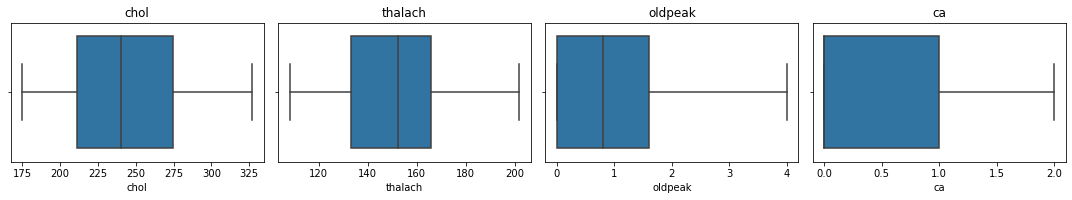

In [35]:
# Assuming df is your DataFrame
feat = ['chol', 'thalach', 'oldpeak', 'ca']

# Create subplots for each feature
plt.figure(figsize=(15, 10))  # Adjust the figure size if needed
for i, feature in enumerate(feat):
    plt.subplot(4, 4, i + 1)  # Create a 4x4 grid of subplots
    sns.boxplot(data=df, x=feature)
    plt.title(feature)
    
plt.tight_layout()  # Adjust the layout for better spacing between subplots
plt.show()

<h3>Interpretation:</h3>
    
From the above boxplots for feature columns which where having outliers we can easily see that all the outliers have been replaced by their closed limit value and hence we have handled outliers using Winsorization technique here.

<h2>Count Plots</h2>

A countplot is a graphical representation that visually displays the distribution of categorical data by counting the occurrences of each unique category and plotting them as bars or columns along an axis. Each bar's height represents the frequency or count of observations belonging to a specific category. Countplots are particularly useful for exploring the distribution of individual categorical variables and identifying the most common or least common categories.

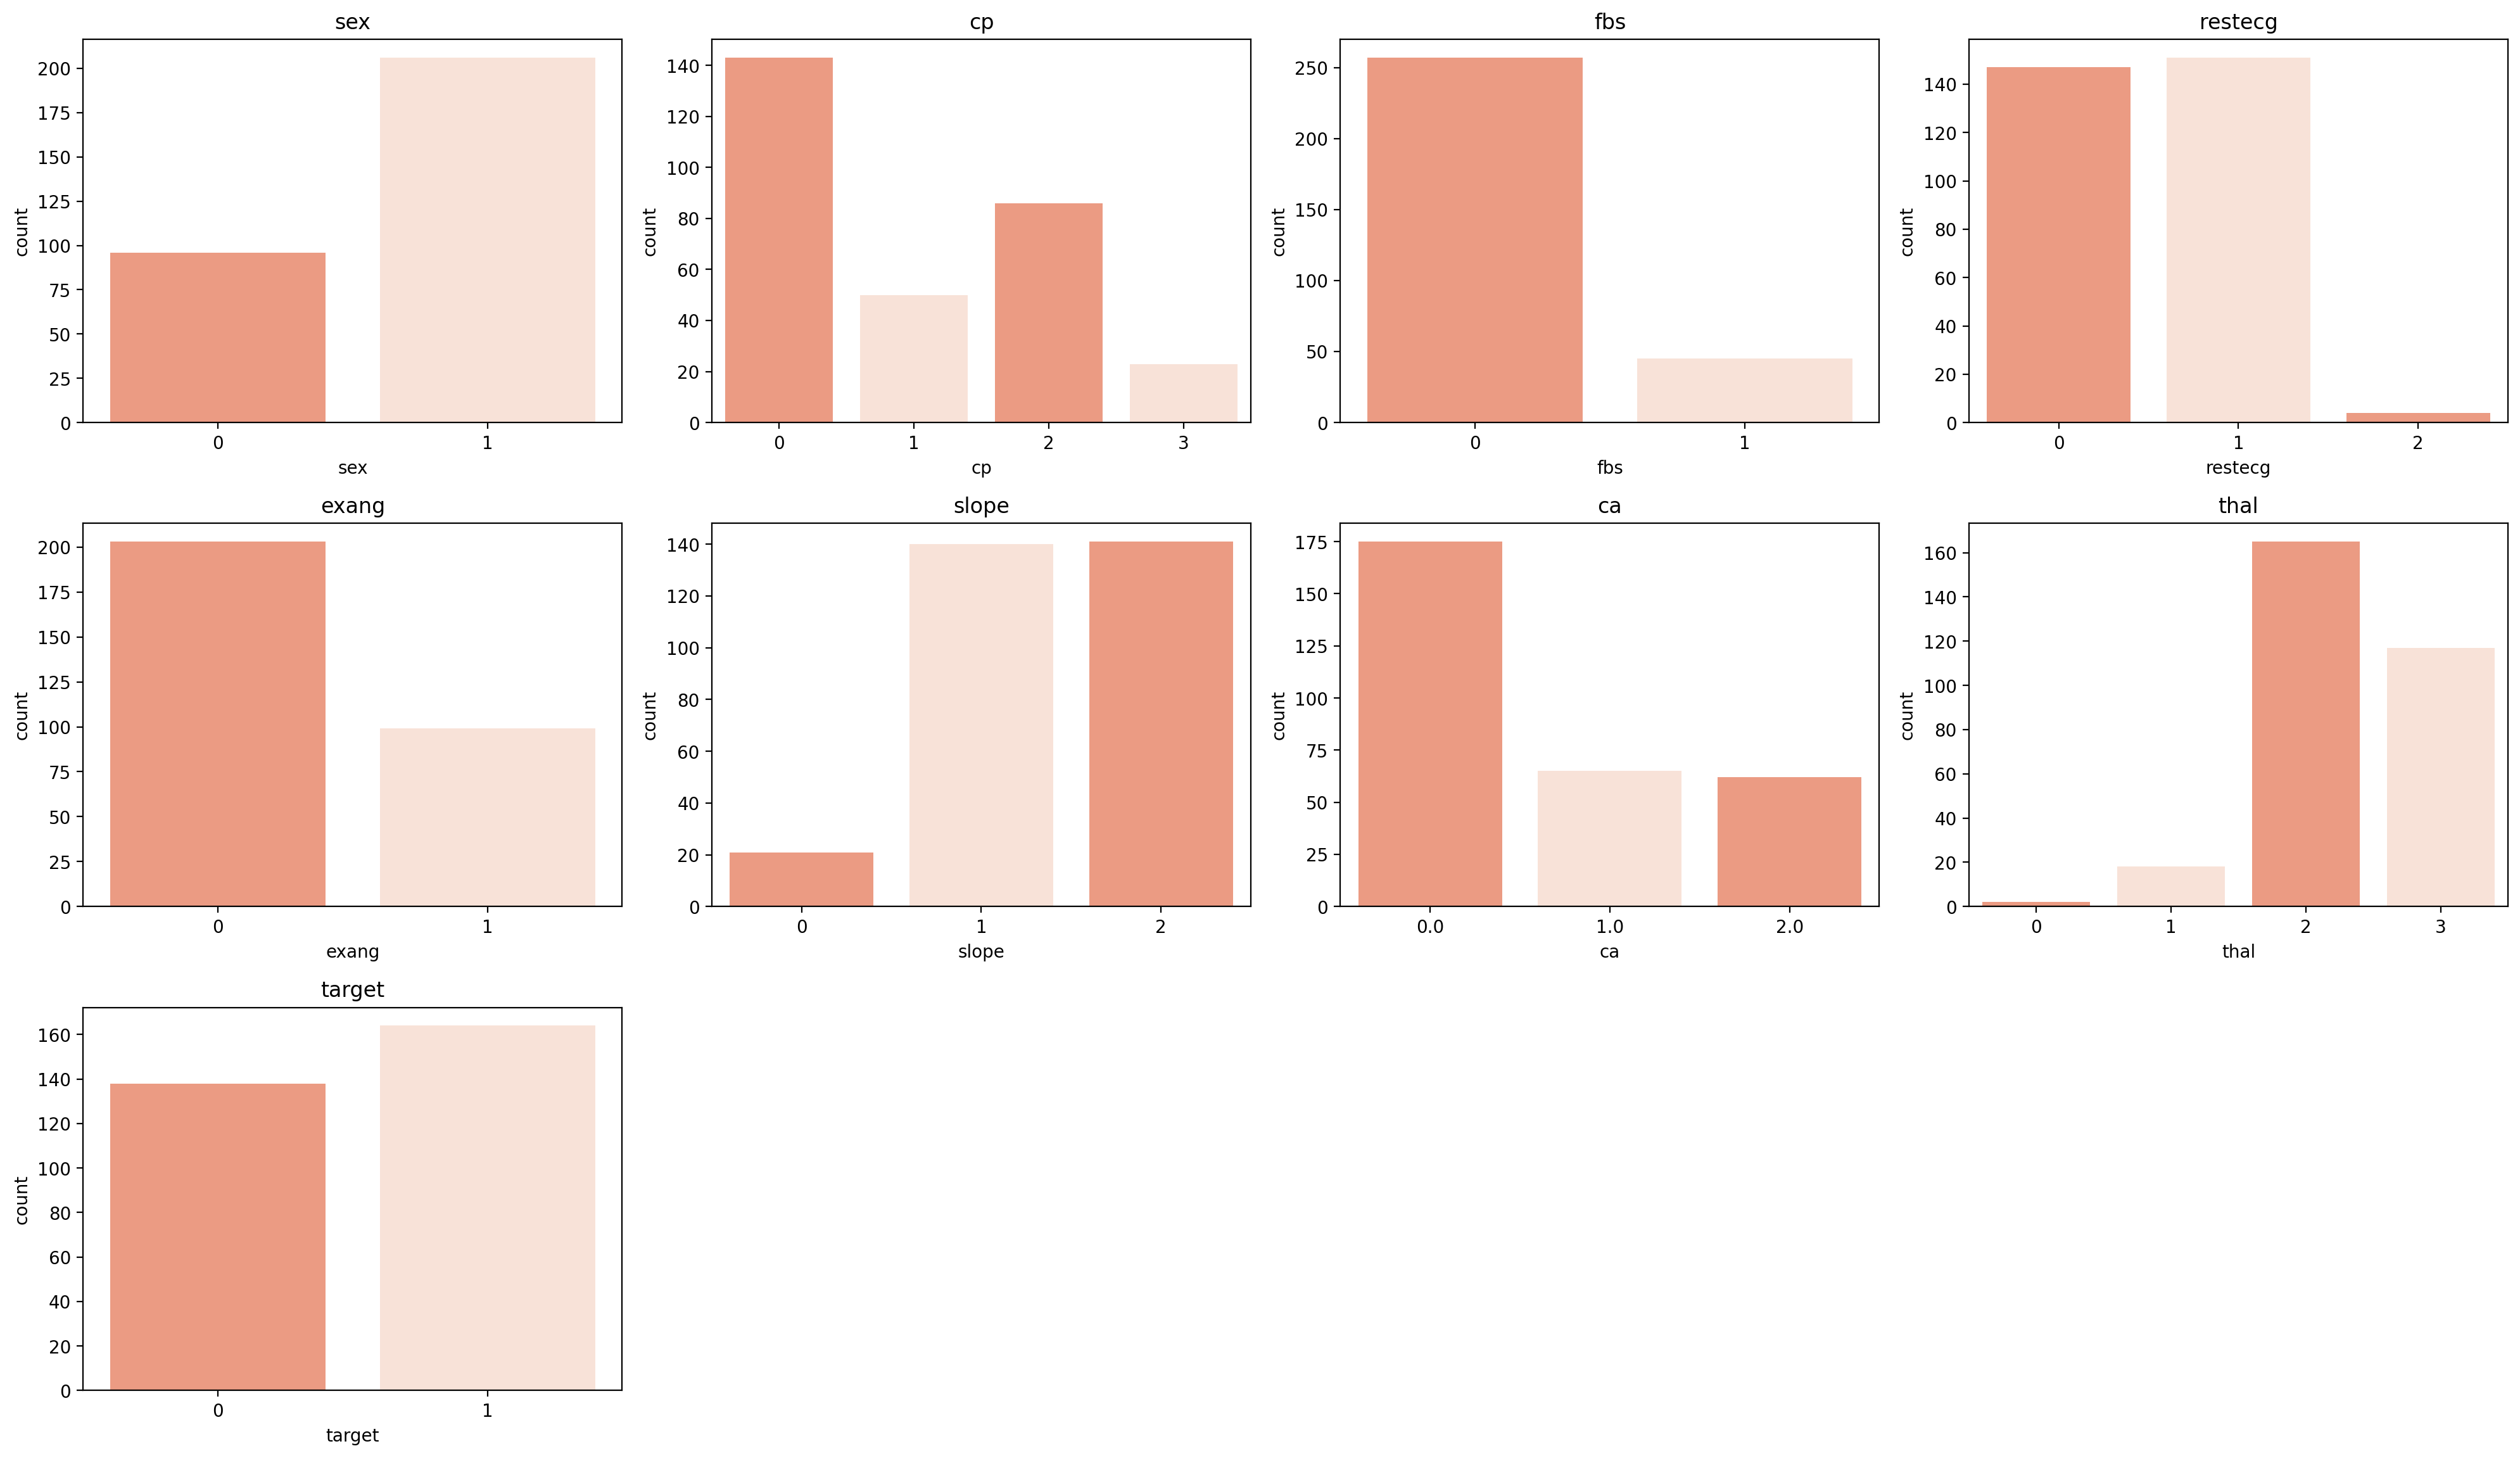

In [36]:
# Assuming df is your DataFrame
feat = ['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal', 'target']

# Create subplots for each feature
plt.figure(figsize=(20,15),dpi=200)  # Adjusting the figure size
for i, feature in enumerate(feat):
    plt.subplot(4, 4, i + 1)  # Creating a 4x4 grid of subplots
    sns.countplot(data=df, x=feature,palette=["#fc9272","#fee0d2"])
    plt.title(feature)
    
plt.tight_layout()  # Adjusting the layout for better spacing between subplots
plt.show()

<h3>Interpretation:</h3>
    
From the above count plot we can draw the following conclusions:
    
1. The count plot for sex column says that the data set has more male people than female, males are twice as compared to females.
2. The count plot for chest pain shows that the number of people with typical agina chest pain is most in number then comes the people who have non-anginal chest pain at second place then comes the people with atypical angina chest pain and at last the people with asymptomatic chest pain.
3. The count plot for fbs shows that there are more people with fasting blood sugar less than 120mg/dl than the people who have fasting blood sugar greater than 200,g/dl.
4. The count plot for restecg shows that people with ST-T wace abnormality are more in number in the dataset, second place is taken by the people with normal ecg and at last comes the people with probable or definite left ventricular by Estes' criteria.
5. The count plot for exang feature says that the people who do not have exercise induced angina are more in number than people who do not exercised induced angina.
6. The count plot for slope feature says that people with downsloping are higher in count, second place are taken by people with flat slope and at last come people with unsloping slope.
7. The countplot for target column says that people who have heart disease and people who do not have it are nearly same in number that is to say that we do not have imbalanced dataset. Although the number of people with heart disease are higher in number than people with no heart disease.

<h2>Plotting Displot</h2>

A displot, short for "distribution plot," is a type of data visualization offered by the Seaborn library in Python. It's 
primarily used to visualize the distribution of univariate data, providing insights into the shape, spread, and characteristics 
of a single variable. The displot combines multiple visualization techniques, such as histograms and kernel density estimation 
(KDE), to provide a comprehensive view of the data's distribution.

<Figure size 4000x4000 with 0 Axes>

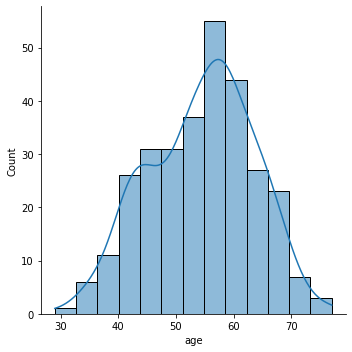

In [37]:
plt.figure(figsize=(20,20),dpi=200)
sns.displot(data=df,x='age',kde=True)

<h3>Interpretation:</h3>
    
This distplot(histogram plot) tells us that age feature column is nearly normally distributed with tells us that the people in our dataset are having the mean age between 55 to 60 years.

<Figure size 2000x1600 with 0 Axes>

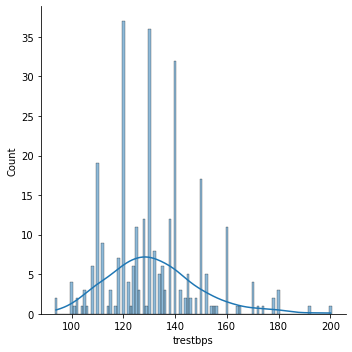

In [38]:
plt.figure(figsize=(10,8),dpi=200)
sns.displot(data=df,x='trestbps',kde=True,bins=14)

<h3>Interpretation:</h3>
    
This distplot (histogram plot) here tells us that trestbps feature column is nearly normally distributed and is slightly left skewed but that skewness is so little and the mean is lying between 127-135 around.

<Figure size 2000x1600 with 0 Axes>

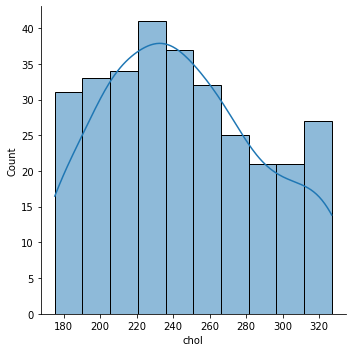

In [39]:
plt.figure(figsize=(10,8),dpi=200)
sns.displot(data=df,x='chol',kde=True)

<h3>Interpretation:</h3>
    
This distplot (histogram plot) here tells us that chol feature column is nearly normally distributed and the mean is lying around 250 or so.

<Figure size 2000x1600 with 0 Axes>

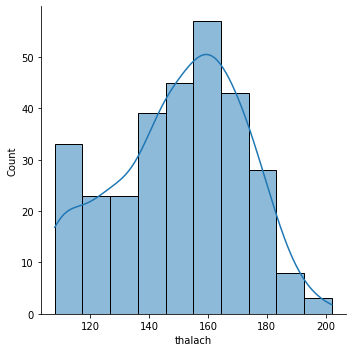

In [40]:
plt.figure(figsize=(10,8),dpi=200)
sns.displot(data=df,x='thalach',kde=True)

<h3>Interpretation:</h3>
    
This distplot (histogram plot) for thalach feature column seems to be slightly right skewed and but it also appears to be normally distributed with mean value being at 160 thalach value.

<Figure size 2000x1600 with 0 Axes>

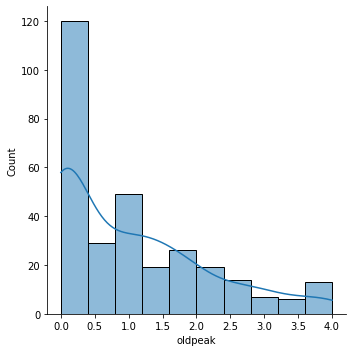

In [41]:
plt.figure(figsize=(10,8),dpi=200)
sns.displot(data=df,x='oldpeak',kde=True)

<h3>Interpretation:</h3>
    
The displot for oldpeak feature column is left skewed with a non-increasing curve as the probability density curve.

<h2>Bivariate Analysis</h2>

Bivariate analysis is a statistical analysis technique that involves analyzing the relationship between two variables simultaneously. It focuses on understanding how the variations in one variable are related to the variations in another variable. Bivariate analysis is an important step in data analysis and provides insights into the interactions and correlations between two variables.

<h3>Correlation between different features and labels</h3>

In [42]:
df.corr()

,age,chol,thalach,oldpeak,ca,thal,target
age,1.000000,0.197333,-0.399177,0.209143,0.352673,0.065317,-0.221476
chol,0.197333,1.000000,-0.026999,0.045038,0.117435,0.091010,-0.111271
thalach,-0.399177,-0.026999,1.000000,-0.361002,-0.247054,-0.100032,0.421569
oldpeak,0.209143,0.045038,-0.361002,1.000000,0.265764,0.207221,-0.435099
ca,0.352673,0.117435,-0.247054,0.265764,1.000000,0.165395,-0.460567
thal,0.065317,0.091010,-0.100032,0.207221,0.165395,1.000000,-0.343101
target,-0.221476,-0.111271,0.421569,-0.435099,-0.460567,-0.343101,1.000000


<h3>Interpretation:</h3>

The above table give us the pearson's coefficient of correlation between features and labeks. That is it tells us 
how much two features or 1 feature and 1 label are correlated (or related) with each other. The more the value of coefficient of pearson's correlation
the more related they are with each other.

The pearson's coefficient can take values from -1 to +1 where '-1' indicates that two variables are strongly negatively correlated
whereas the '+1' indicates that two variables are strongly positively correlated with each other.

For example: The correlation between oldpeak feature column and thalch feature column is 0.342201 that is both features are 
negatively correlated which means that if the values for oldpeak will increase then the values for thalach will decrease and vice
versa. Similary the pearson's correlation coefficient for thalach feature and target label column is 0.4199 that is thalach is
positively correlated with target label column, that is if we increase the values for thalach column then the 
corresponding values for target label will also increase.

<h2>Heatmap for Feature and Labels</h2>

A heatmap is a graphical representation of data where values in a matrix are represented as colors. A heatmap in Seaborn is commonly used to visualize the correlation between numerical values in a dataset. In Python's Seaborn library, a heatmap is often used to visualize the correlation matrix, which displays the pairwise correlations between numerical variables.

In a correlation heatmap:

1. Each cell represents the correlation between two variables.
2. The color of the cell indicates the strength and direction of the correlation.
3. Positive correlations are usually depicted with warm colors (e.g., red or orange).
4. Negative correlations are often depicted with cool colors (e.g., blue or green).

<AxesSubplot:>

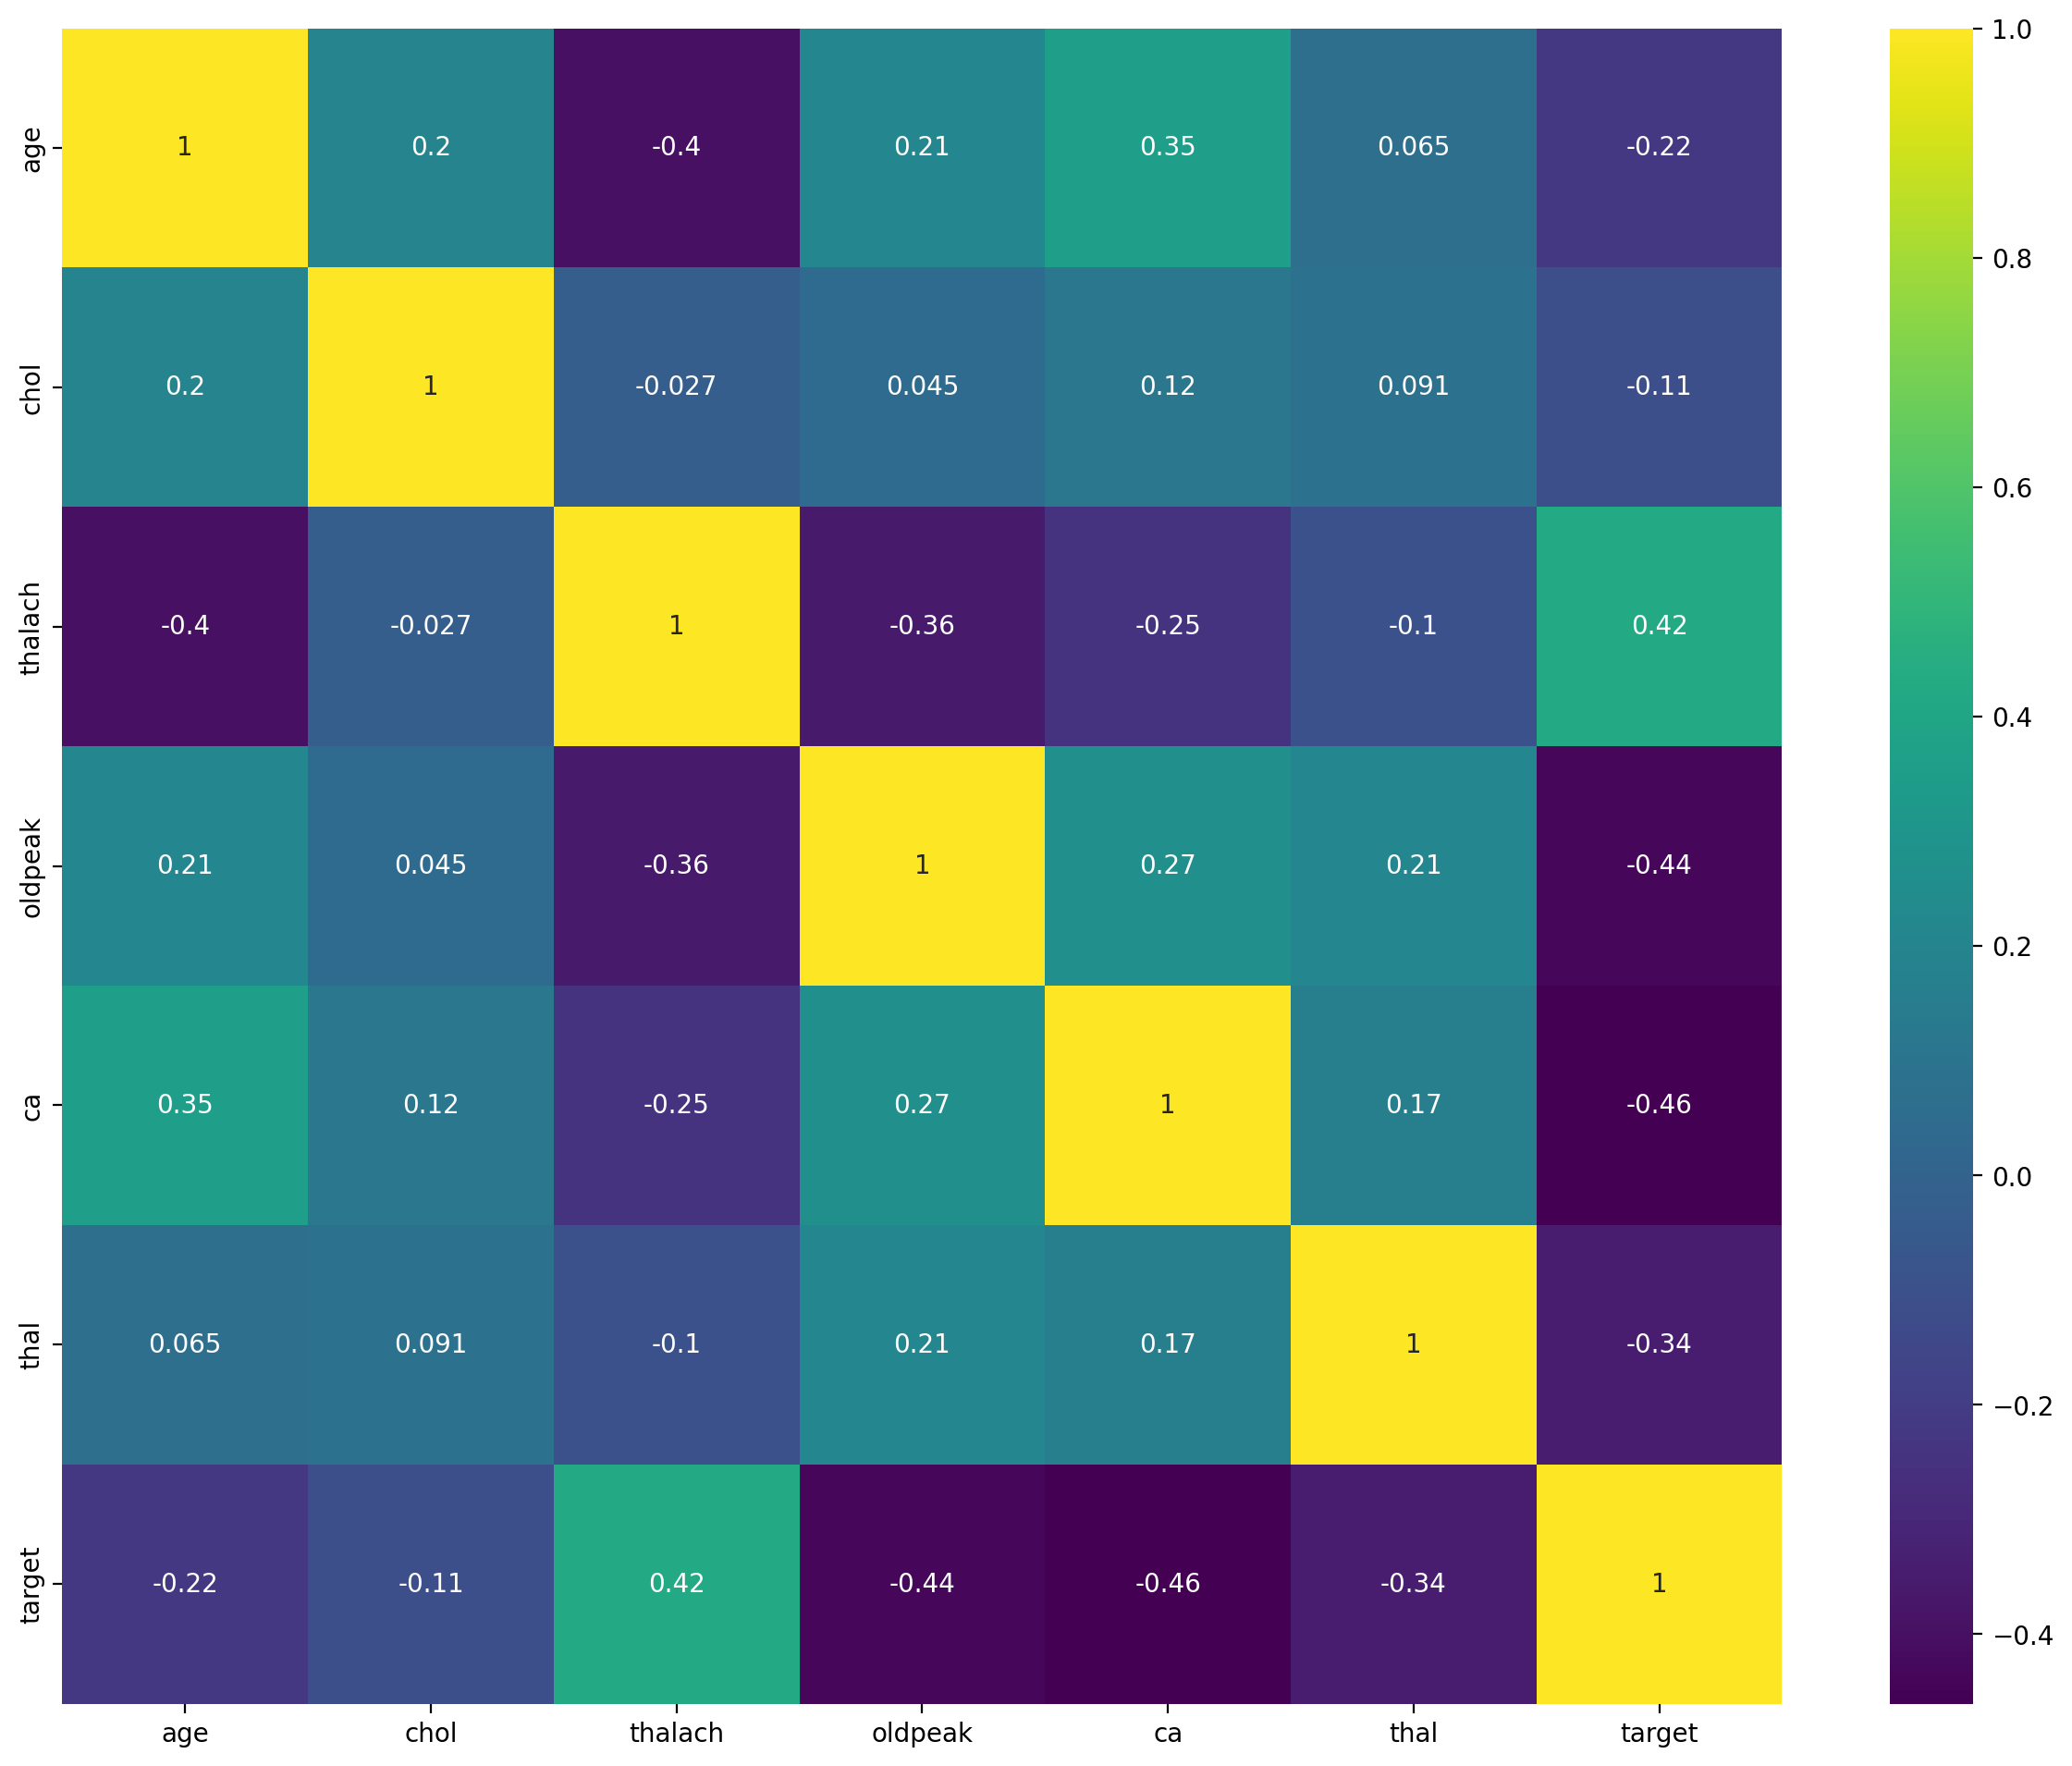

In [43]:
plt.figure(figsize=(15,12),dpi=200)
sns.heatmap(data=df.corr(),annot=True,cmap='viridis')

<h3>Interpretation:</h3>
    
From the above heatmap we can see that feature and labels when correlated with themseleves gives a psositive correlation value of 1 which is statistically correct as well. And we can also see that most of the features and their correlation with themsleves is very low.

<h2>Checking for Multicolinearity from Heatmap</h2>

Multicolinearity
    
Multicollinearity is a statistical phenomenon that occurs when two or more independent variables (feature columns) in a regression model are 
highly correlated with each other. In other words, multicollinearity indicates a strong linear relationship between predictor 
variables. This can have a significant impact on the interpretation of regression models and might lead to unreliable or 
misleading results.

We can check for multicolinearity in dataset using the pearson's coefficient for correlation that is to say if the pearson's
correlation values for two feature columns lies in the range [-0.9,-1] or [0.9,1] then we'll say that those feature columns are
multicollinear. But since from seeing the above heatmap correlation matrix plot we can see that no two feature columns have the 
values in mentioned range we can say that our data is not having any multicollinear feature columns.

<h2>Multivariate Analysis</h2>

Multivariate analysis is a statistical technique that involves analyzing and understanding the relationships between multiple variables simultaneously. Unlike univariate analysis (which focuses on one variable) and bivariate analysis (which focuses on the relationships between two variables), multivariate analysis considers the interactions and patterns among three or more variables.

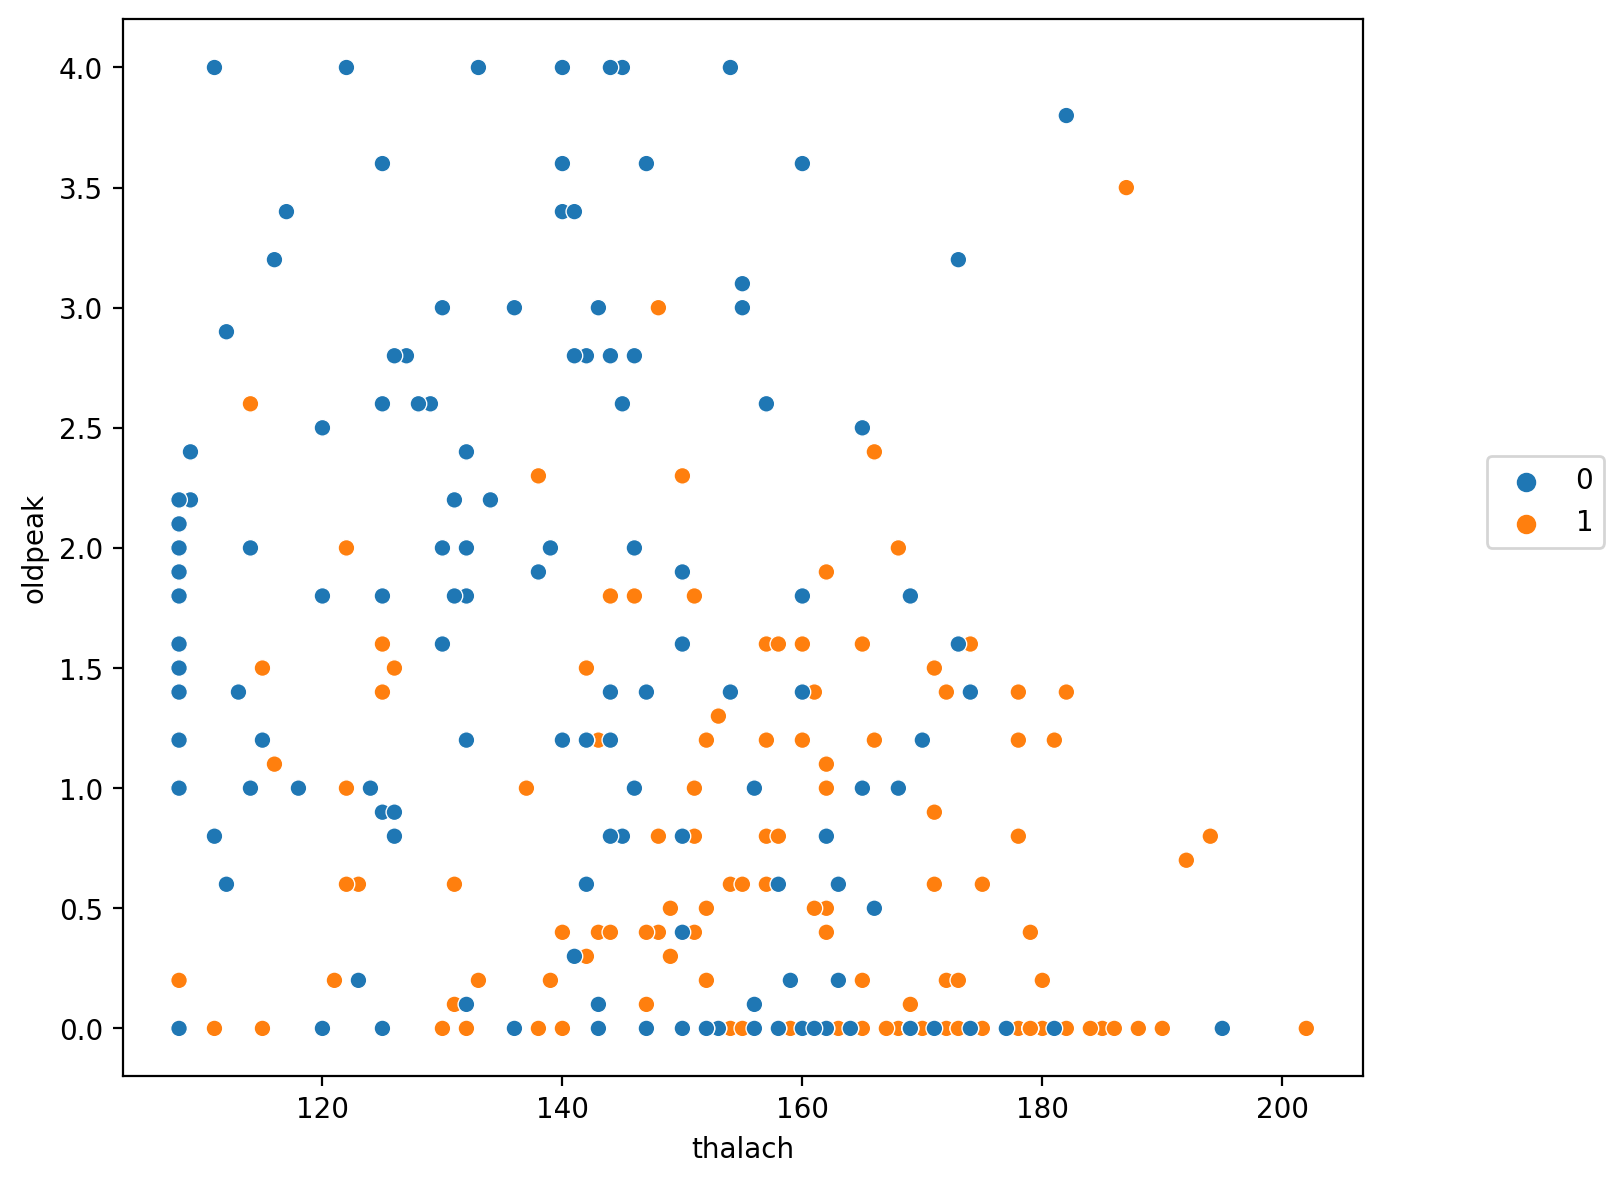

In [44]:
plt.figure(figsize=(8,7),dpi=200)
sns.scatterplot(data=df,x='thalach',y='oldpeak',hue='target')
plt.legend(loc=(1.1,0.5))

<h3>Interpretation:</h3>
    
From the above plot with hue attribute we can say that number of people who have high thalach value and low oldpeak value are
more susceptible to getting heart disease than people with low thalach value and low old peak value. Also we can see that
density of people with more thalach value and low oldpeak value getting heart disease is more. So, it would not be wrong to say
that thalach contributes more strongly to target column than oldpeak.

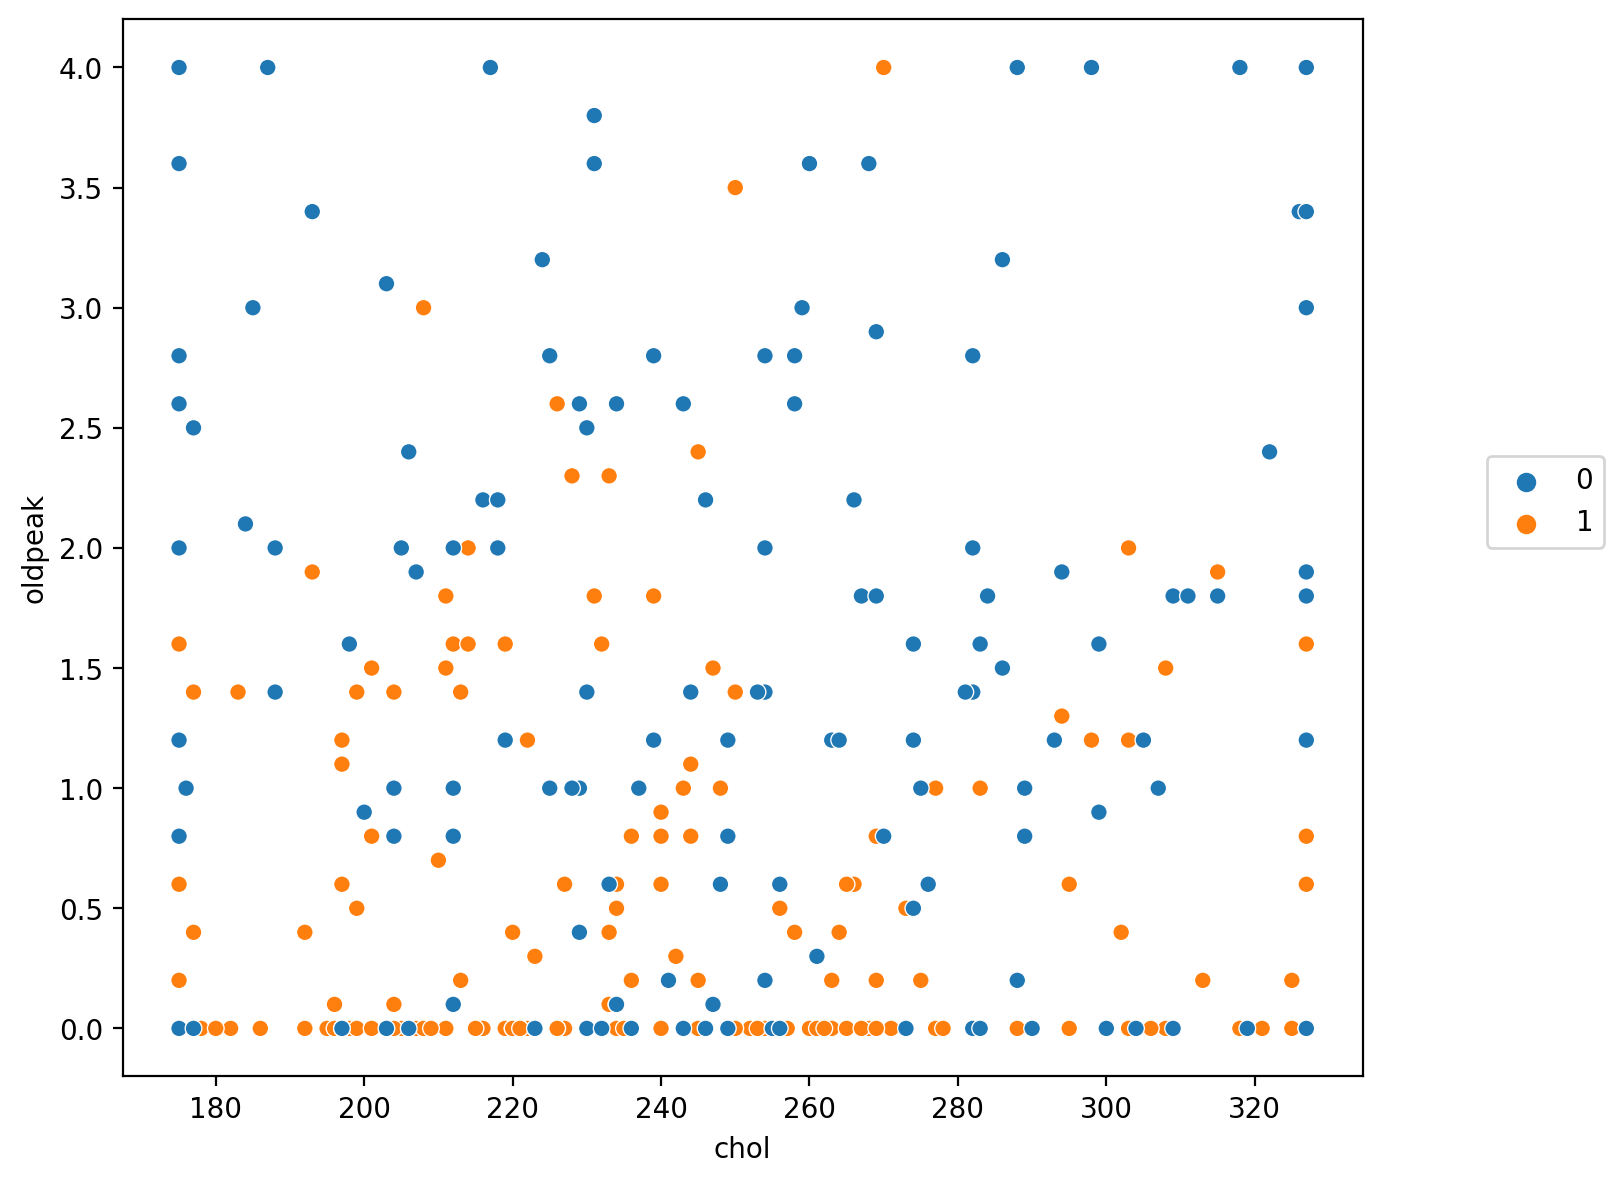

In [45]:
plt.figure(figsize=(8,7),dpi=200)
sns.scatterplot(data=df,x='chol',y='oldpeak',hue='target')
plt.legend(loc=(1.1,0.5))

<h3>Interpretation:</h3>
    
From this scatter plot we deduce that the people with heart disease have the more chol (chloestrol level around 200 to 300) and low old peak value. This implies that cholestrol contributes more significantly than the old peak value in presence of heart disease. 

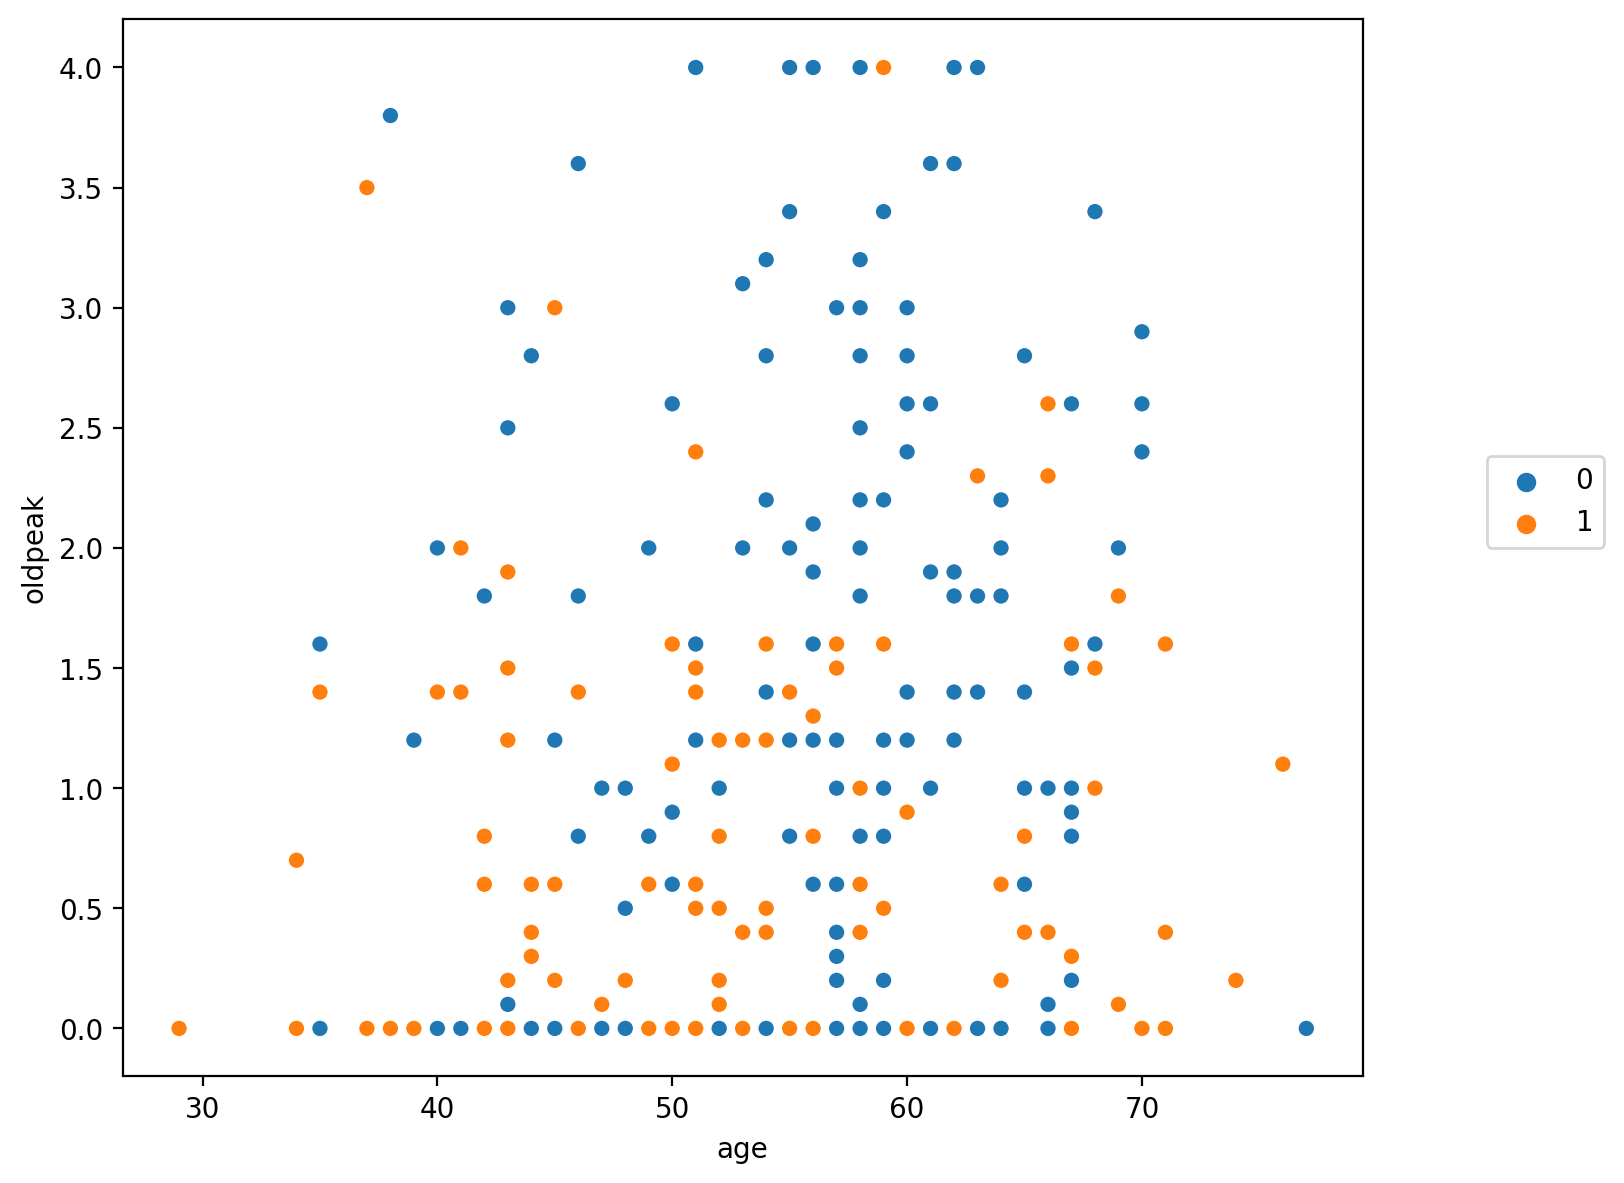

In [46]:
plt.figure(figsize=(8,7),dpi=200)
sns.scatterplot(data=df,x='age',y='oldpeak',hue='target')
plt.legend(loc=(1.1,0.5))

<h3>Interpretation:</h3>
    
From this scatterplot we can observe that people with age range 40 to 55 years are more prone to having a heart disease as compared to any other age group at low value of oldpeak.

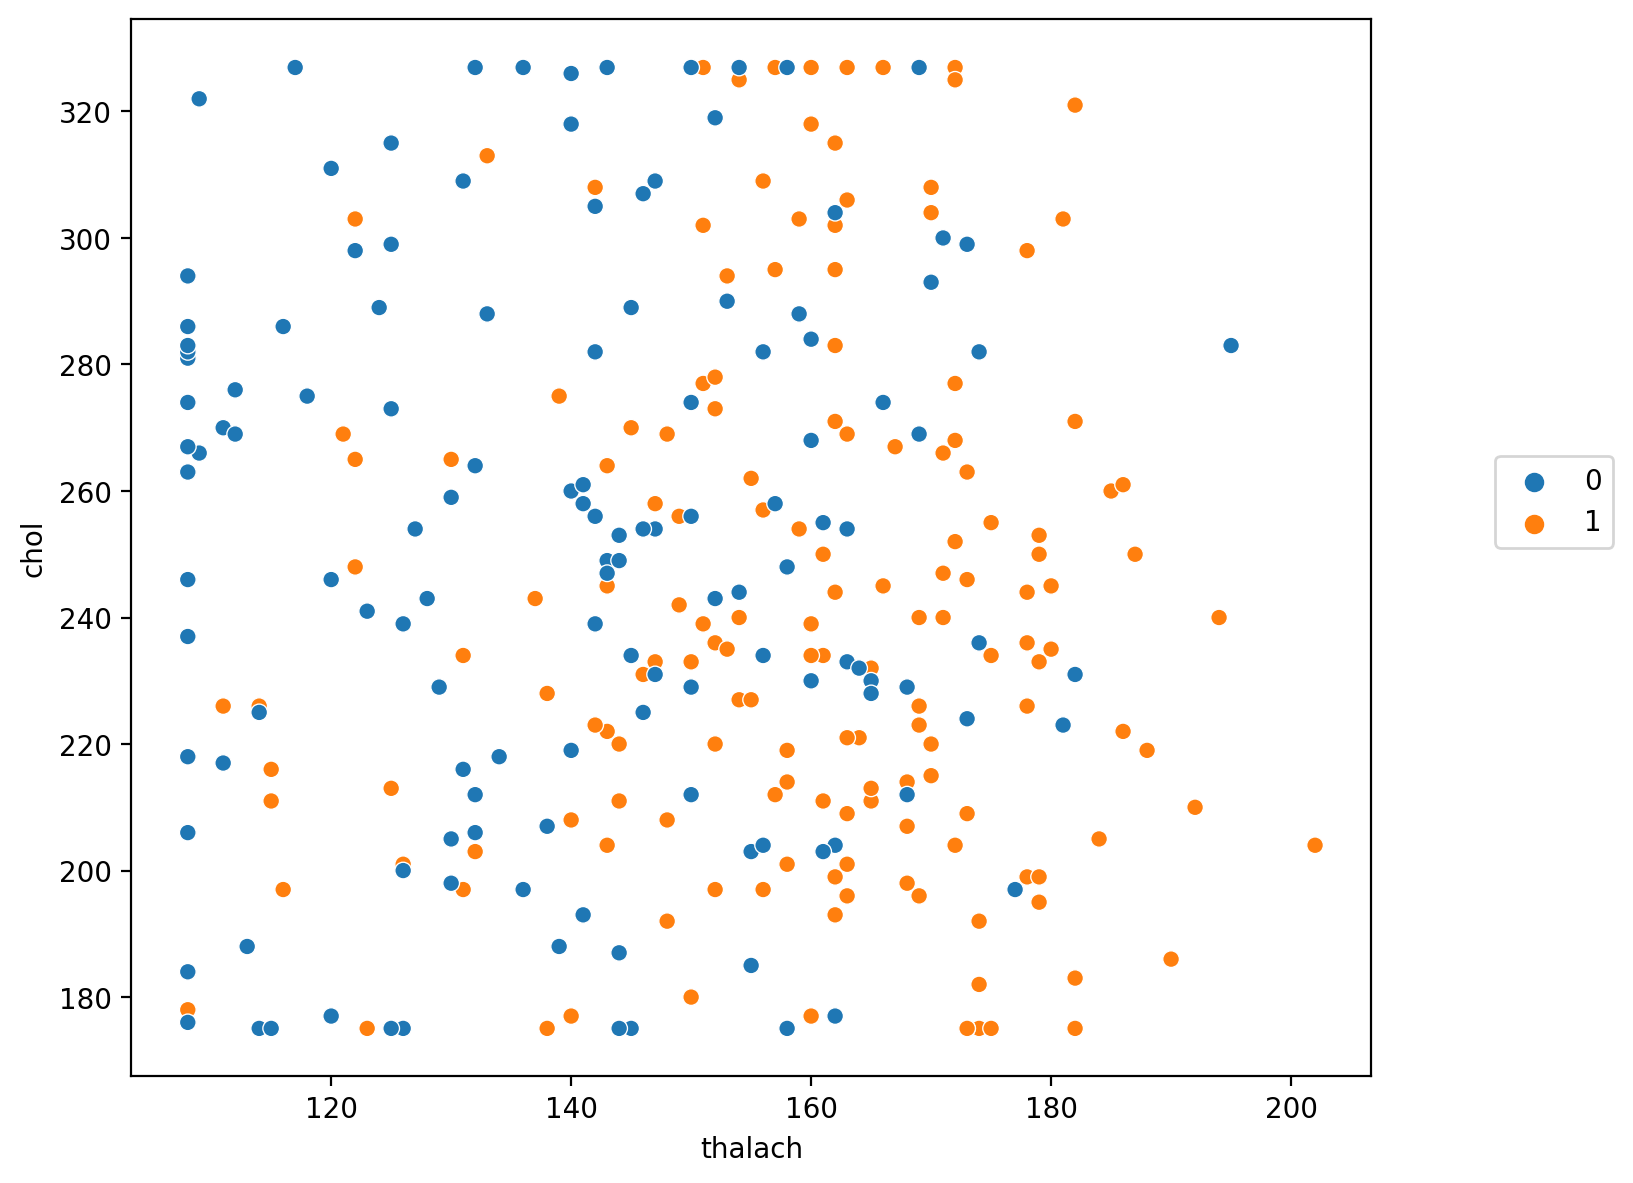

In [47]:
plt.figure(figsize=(8,7),dpi=200)
sns.scatterplot(data=df,x='thalach',y='chol',hue='target')
plt.legend(loc=(1.1,0.5))

<h3>Interpretation:</h3>
    
This plot explains that people in the range of thalach value 150 to 190 are more prone to heart disease cases even 
at low value of chol and that thalach feature column contributes more to target label column as compared to chol feature column.

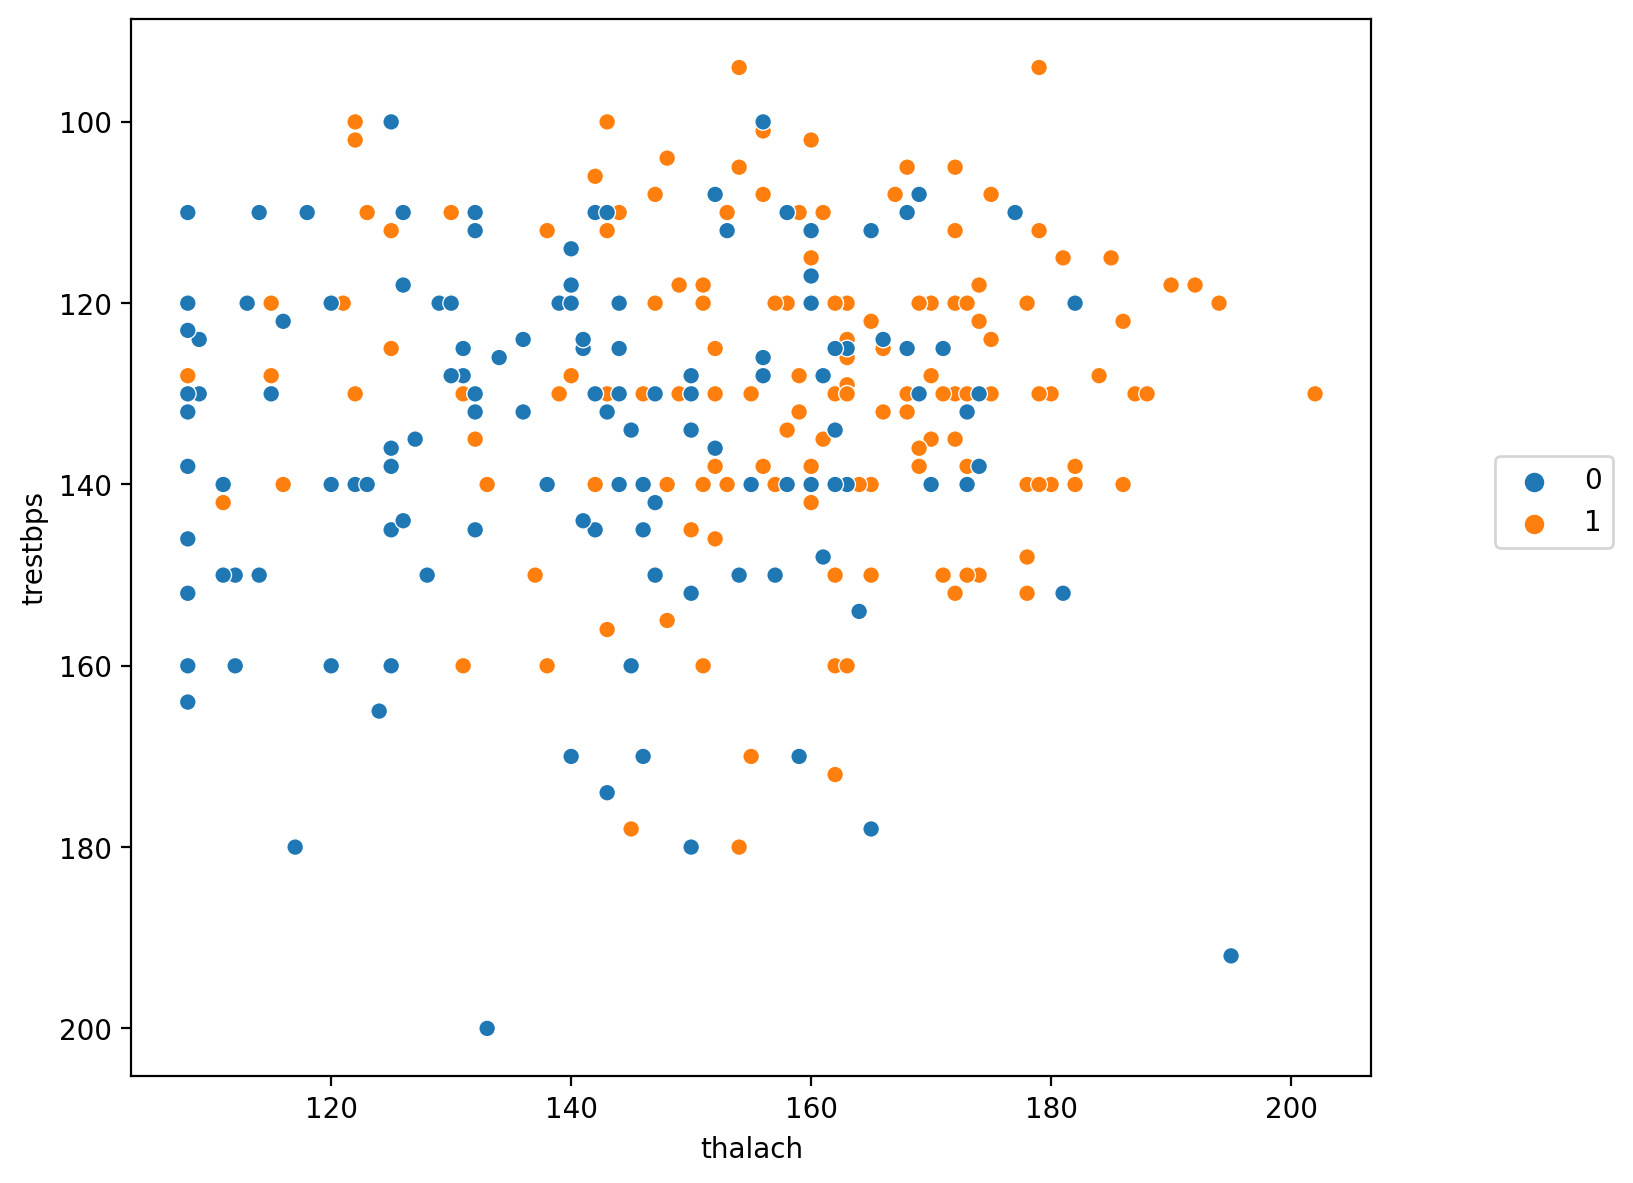

In [48]:
plt.figure(figsize=(8,7),dpi=200)
sns.scatterplot(data=df,x='thalach',y='trestbps',hue='target')
plt.legend(loc=(1.1,0.5))

<h3>Interpretation:</h3>
    
This plot explains that people in the range of thalach value 140 to 185 are more prone to heart disease cases even 
at low value of trestbps and that thalach feature column contributes more to target label column as compared to trestbps feature column.

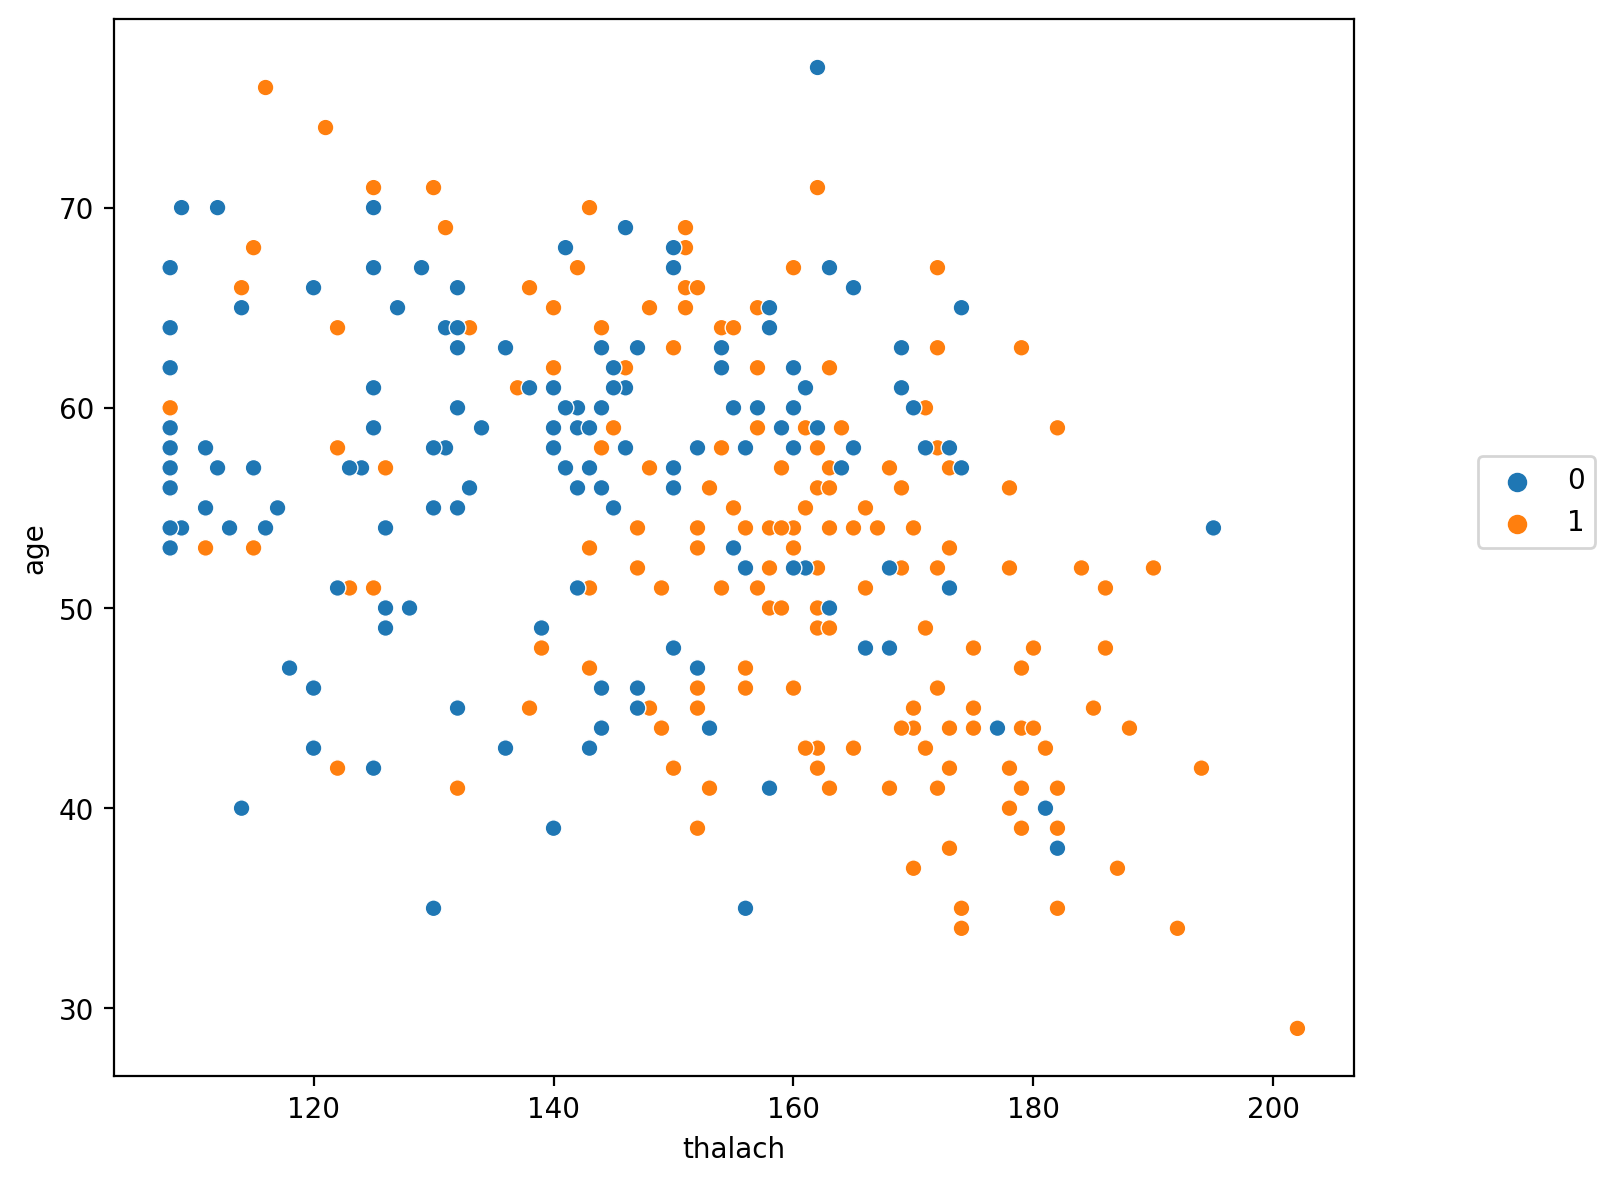

In [49]:
plt.figure(figsize=(8,7),dpi=200)
sns.scatterplot(data=df,x='thalach',y='age',hue='target')
plt.legend(loc=(1.1,0.5))

<h3>Interpretation:</h3>
    
This plot says that if the thalach value is higher than people even at the age range of 30-40 are susceptible to heart disease
and it also says that people at very high age like above 60 can get heart disease even at low value of thalach. So we can say
that both age and thalach feature columns contributes to the target label column but the contribution of thalach feature column exceeds
the contribution of age feature column.

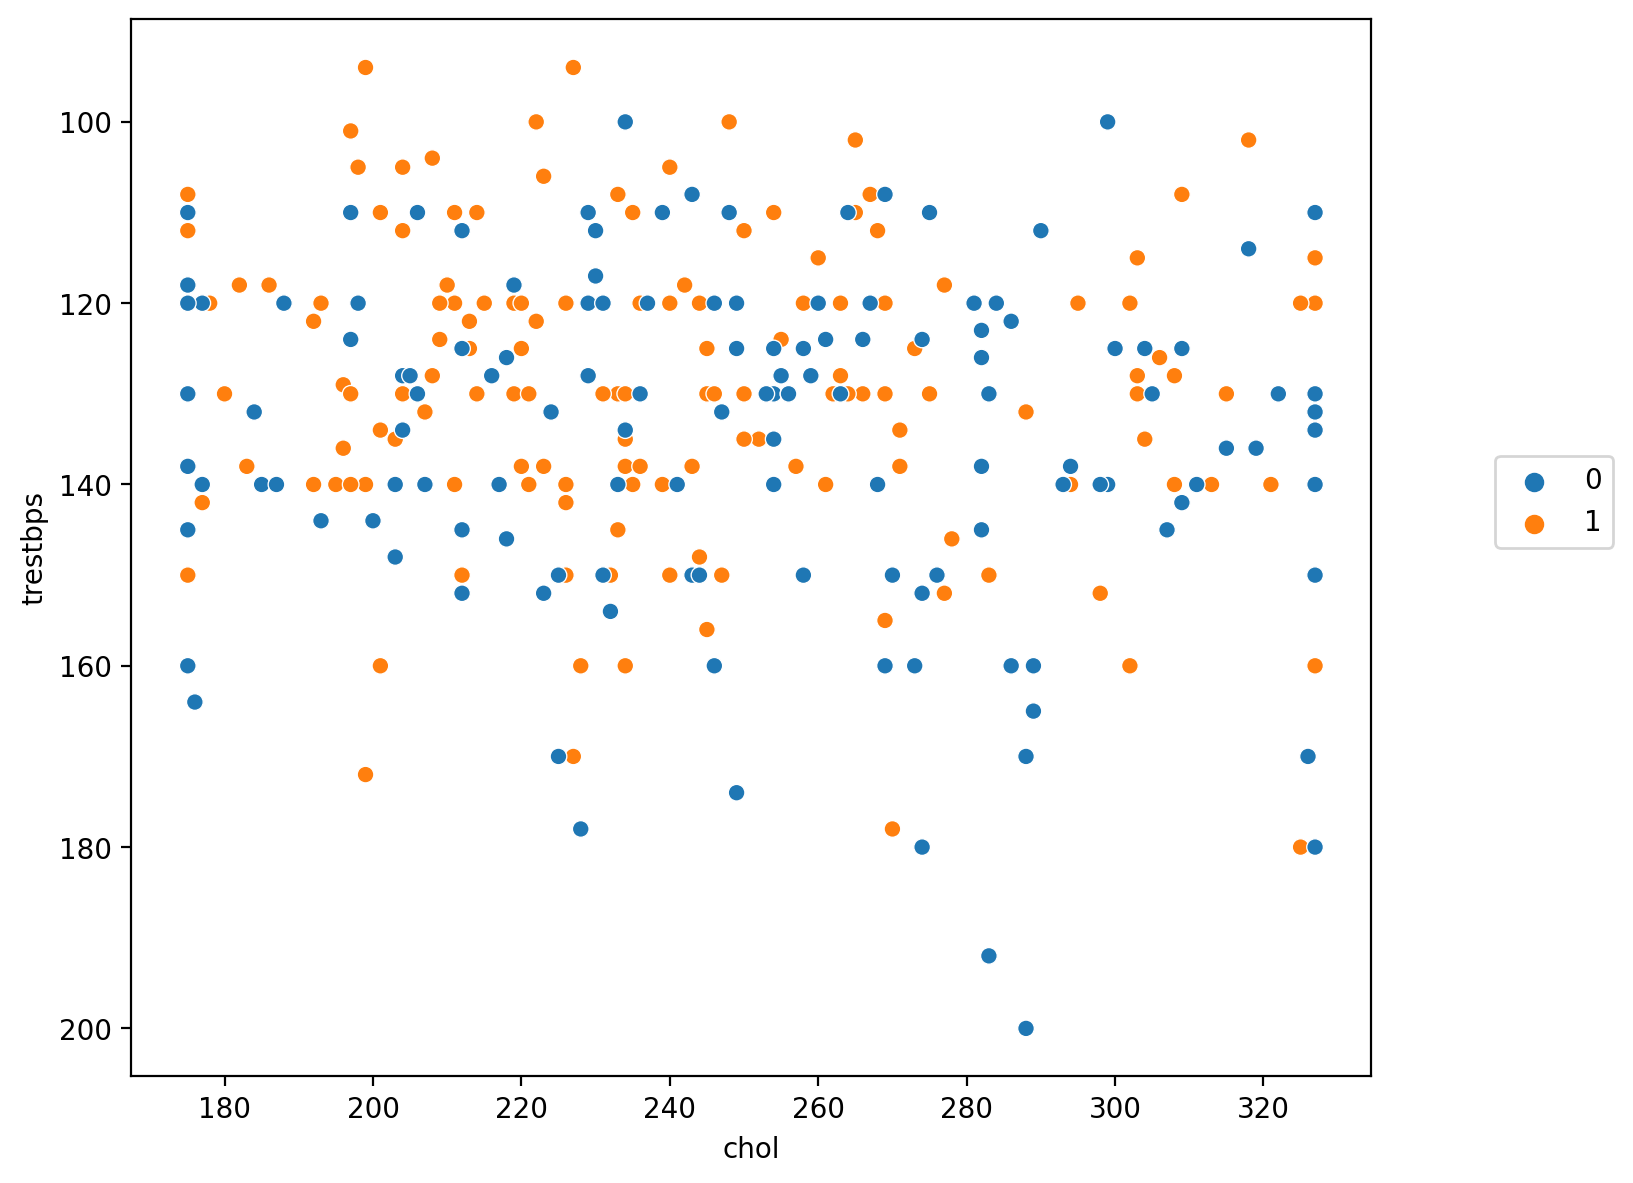

In [50]:
plt.figure(figsize=(8,7),dpi=200)
sns.scatterplot(data=df,x='chol',y='trestbps',hue='target')
plt.legend(loc=(1.1,0.5))

<h3>Interpretation:</h3>
    
From this scatter plot we can say that cholestrol level in the range of 200 to 270 and trestbps value between 120 to 145 are 
have more density of population with heart disease and we can also see that if the chlestrol level is high enough like above 
500 than it is suffiecient for a patient to have heart disease whereas if the person is having as high value of trestbps as 200 is not sufficient to make the person to have the heart disease.

<h2>Plotting PairPlot</h2>

A pair plot, also known as a scatterplot matrix, is a data visualization technique used to explore the relationships 
between multiple pairs of variables in a dataset. It's a versatile tool for understanding the correlations, distributions, 
and potential patterns among variables in a multivariate dataset.

In a pair plot:

1. Each variable is plotted on both the x-axis and y-axis.
2. The diagonal of the plot typically displays histograms or density plots for each variable.
3. The off-diagonal cells show scatter plots representing the relationship between pairs of variables.

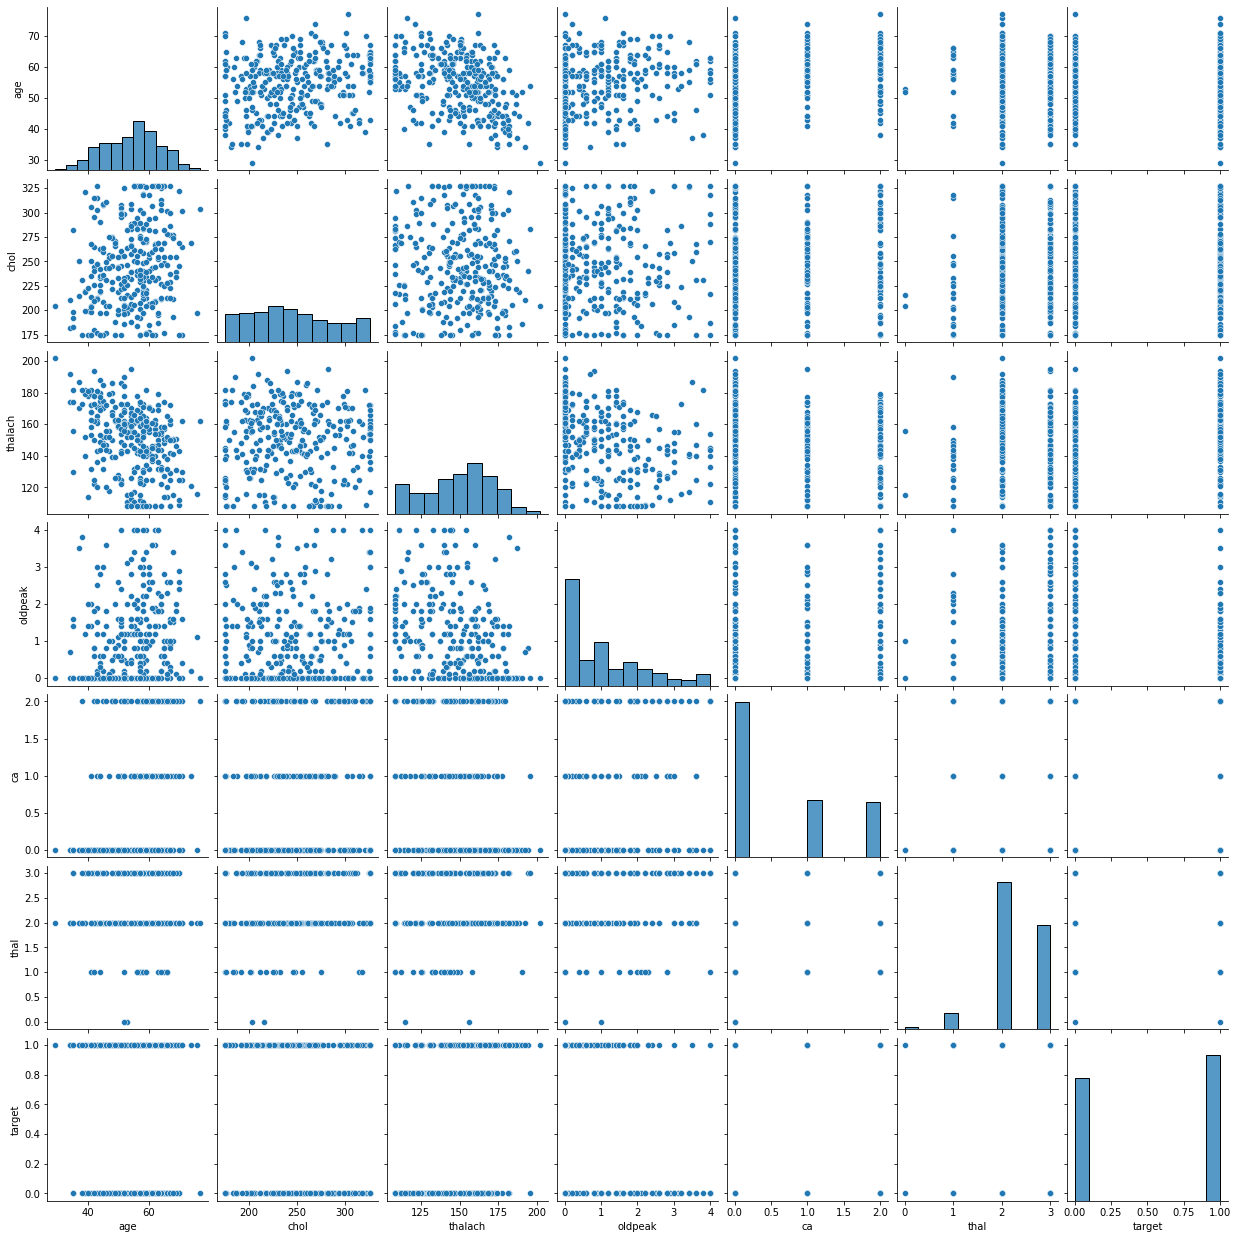

In [51]:
sns.pairplot(data=df)

<h3>Interpretation:</h3>
    
From the above pairplot we can see the different distributions of the between each feature to feature and feature to label
combinations.

<h2>Model Building Step</h2>

<h2>Separation the Features and Labels</h2>

In [52]:
X=df.drop('target',axis=1)
y=df['target']

In [53]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233.00,1,0,150.0,0,2.3,0,0.0,1
1,37,1,2,130,250.00,0,1,187.0,0,3.5,0,0.0,2
2,41,0,1,130,204.00,0,0,172.0,0,1.4,2,0.0,2
3,56,1,1,120,236.00,0,1,178.0,0,0.8,2,0.0,2
4,57,0,0,120,326.95,0,1,163.0,1,0.6,2,0.0,2


In [54]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

<h2>Splitting data into Training and Test set</h2>

Splitting a dataset into a training set and a test set is a critical step in the process of developing machine learning models. This division allows you to train your model on one portion of the data and then evaluate its performance on another independent portion. This separation helps assess how well your model generalizes to new, unseen data and helps prevent overfitting, which is when a model performs well on the training data but poorly on new data.

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
print('\n Shape of X_train set is:',X_train.shape,'\n','Shape of X_test set is:', X_test.shape, '\n','Shape of y_train set is:', y_train.shape, '\n','Shape of y_test set is:', y_test.shape)


 Shape of X_train set is: (211, 13) 
 Shape of X_test set is: (91, 13) 
 Shape of y_train set is: (211,) 
 Shape of y_test set is: (91,)


<h2>Scaling our Dataset</h2>

Feature scaling is the process of transforming input features to have a consistent scale, ensuring that the magnitudes of different features are comparable. This improves the performance and convergence of various machine learning algorithms by preventing features with larger scales from dominating the learning process.

<h2>StandardScaler</h2>

The StandardScaler is a widely used scaling technique in machine learning for preprocessing numerical data. It's a part of the preprocessing module in scikit-learn, a popular machine learning library in Python. The StandardScaler transforms the data by subtracting the mean and dividing by the standard deviation, resulting in data with a mean of zero and a standard deviation of one. This technique is also known as Z-score normalization or standarization.

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler=StandardScaler()

In [60]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [61]:
print('After scaling our scaled_X_train looks like this:\n\n',scaled_X_train)

After scaling our scaled_X_train looks like this:

 [[-0.91249208  0.70459485 -0.93023403 ... -0.6238156   1.65792972
   1.13783702]
 [ 0.49762949  0.70459485 -0.93023403 ... -0.6238156   1.65792972
  -2.26760428]
 [-0.47860852 -1.41925534 -0.93023403 ...  1.00118554 -0.79696973
  -0.56488363]
 ...
 [-0.91249208  0.70459485  0.03665947 ...  1.00118554 -0.79696973
   1.13783702]
 [-1.45484654  0.70459485  0.03665947 ... -0.6238156  -0.79696973
  -2.26760428]
 [-0.6955503  -1.41925534  1.00355297 ...  1.00118554 -0.79696973
  -0.56488363]]


In [62]:
print('After scaling our scaled_X_test looks like this:\n\n',scaled_X_test)

After scaling our scaled_X_test looks like this:

 [[-1.45484654  0.70459485  0.03665947 ...  1.00118554 -0.79696973
  -0.56488363]
 [-0.26166674  0.70459485  1.00355297 ...  1.00118554 -0.79696973
   1.13783702]
 [ 0.3891586  -1.41925534 -0.93023403 ... -0.6238156  -0.79696973
  -0.56488363]
 ...
 [-0.6955503   0.70459485 -0.93023403 ...  1.00118554  1.65792972
   1.13783702]
 [ 1.14845483  0.70459485 -0.93023403 ...  1.00118554 -0.79696973
   1.13783702]
 [-0.37013763 -1.41925534 -0.93023403 ... -0.6238156  -0.79696973
   1.13783702]]


In [63]:
print('The shape of scaled_X_train and scaled_X_test are as follows:',scaled_X_train.shape,'&',scaled_X_test.shape)

The shape of scaled_X_train and scaled_X_test are as follows: (211, 13) & (91, 13)


<h1>Model Builiding and Training</h1>

<h2>1. Logistic Model</h2>

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logmodel=LogisticRegression()

In [66]:
logmodel.fit(scaled_X_train,y_train)

LogisticRegression()

<h2>2. K-Nearest Neighbors (KNN) Model</h2>

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knnmodel=KNeighborsClassifier(n_neighbors=10)

In [69]:
knnmodel.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

<h2>3. Support Vector Machine (SVM) Model</h2>

In [70]:
from sklearn.svm import SVC

In [71]:
svm=SVC(kernel='linear')

In [72]:
svm.fit(scaled_X_train,y_train)

SVC(kernel='linear')

<h2>4. Decision Trees model</h2>

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dtmodel=DecisionTreeClassifier()

In [75]:
dtmodel.fit(scaled_X_train,y_train)

DecisionTreeClassifier()

<h2>5. Random Forest Model</h2>

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf=RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [78]:
rf.fit(scaled_X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

<h2>6. Naive-Bayes Model</h2>

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
nbmodel=GaussianNB()

In [81]:
nbmodel.fit(scaled_X_train,y_train)

GaussianNB()

<h1>Performance Evaluation of Each Models</h1>

<h2>Importing Model Performance Metrics</h2>

Performance metrics are quantitative measures used to assess the effectiveness and quality of machine learning models, algorithms, or systems. They provide a way to evaluate how well a model is performing its intended task by comparing its predictions or classifications against actual ground truth values. Different tasks, such as classification, regression, and clustering, require different performance metrics tailored to their specific objectives.

In [82]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

<h2>User-Defined function for Evaluation</h2>

For evaluating the performance of each model we'll create a user defined function which will take model and predict its performance on the basisc of accuracy_score,precision,recall and f1_score

In [83]:
def evaluate_performance(model):
    preds=model.predict(scaled_X_test) #for making the predictions 
    plt.figure(figsize=(10,9),dpi=200)
    print("This is accuracy score for this model:", accuracy_score(y_test,preds)) #this will give us accuracy_score
    print('\n')
    print('This is Classification Report for this model:\n',classification_report(y_test,preds)) #this will give us classification_report
    print('\n')
    print('This is Plot Confusion matrix for this model:')
    plot_confusion_matrix(model,scaled_X_test,y_test) #this will give us plot_confusion_matrix
    print('\n')
    print('This is ROC curve for this model:')
    plot_roc_curve(model,scaled_X_test,y_test) #plot_roc_curve
    print('\n')
    print('This is Precision_Recall_curve for this model:')
    plot_precision_recall_curve(model,scaled_X_test,y_test) #plot_roc_curve

<h1>Model Performance</h1>

<h2>1. Logistic Model</h2>

This is accuracy score for this model: 0.8571428571428571


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84        43
           1       0.82      0.94      0.87        48

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

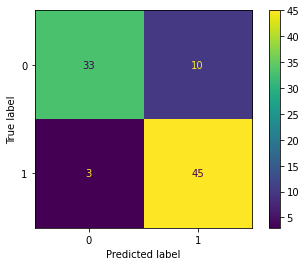

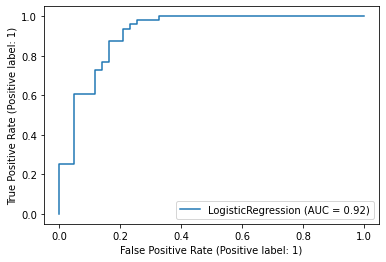

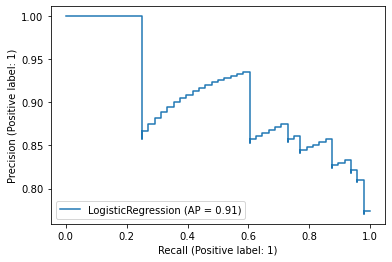

In [84]:
evaluate_performance(logmodel)

<h3>Interpretation:</h3>
    
From the above performance metrices we can gain the following insights:
    
1. The accuracy_score of logistic model is 87%.
2. The precision_score for positive and negative heart disease cases of logistic model are 80% and 90%.
3. The recall_score for positive and negative heart disease cases of logistic model are 92% and 81%.
4. The f1_score for positive and negative heart disease cases of logistic model are 88% and 85%.
5. From plot confusion matrix we can get the True Positive, True Negative, False Positive and False Negative values as follows: 
35(TP), 44(TN), 8(FP) and 4(FN).
6. The Area under the curve we got from ROC_AUC_ Curve is 90% for logistic model and we can see from this curve that for different thresold values we are getting different confusion metrices with different values of False positive rate (FPR) and True Positive Rate(TPR).
7. The area under the curve of precision_recall_curve is 89%.

<h2>2. K-Nearest Neighbors (KNN) Model</h2>

This is accuracy score for this model: 0.8021978021978022


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77        43
           1       0.77      0.90      0.83        48

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

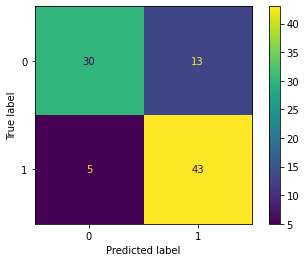

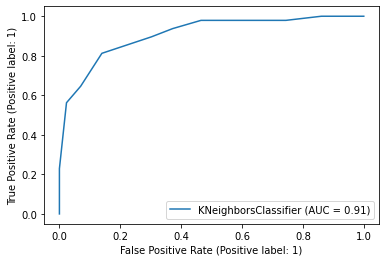

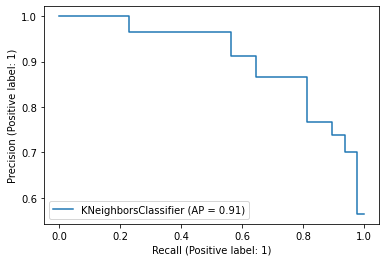

In [85]:
evaluate_performance(knnmodel)

<h3>Interpretation:</h3>
    
From the above performance metrices we can gain the following insights:
    
1. The accuracy_score of KNN model is 79%.
2. The precision_score for positive and negative heart disease cases of KNN model are 77% and 82%.
3. The recall_score for positive and negative heart disease cases of KNN model are 85% and 72%.
4. The f1_score for positive and negative heart disease cases of KNN model are 81% and 77%.
5. From plot confusion matrix we can get the True Positive, True Negative, False Positive and False Negative values as follows: 
31(TP), 41(TN), 12(FP) and 7(FN).
6. The Area under the curve we got from ROC_AUC_ Curve is 90% for KNN model and we can see from this curve that for different thresold values we are getting different confusion metrices with different values of False positive rate (FPR) and True Positive Rate(TPR).
7. The area under the curve of precision_recall_curve for KNN model is 89%.

<h2>3. Support Vector Machine (SVM) Model</h2>

This is accuracy score for this model: 0.8791208791208791


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.97      0.77      0.86        43
           1       0.82      0.98      0.90        48

    accuracy                           0.88        91
   macro avg       0.90      0.87      0.88        91
weighted avg       0.89      0.88      0.88        91



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

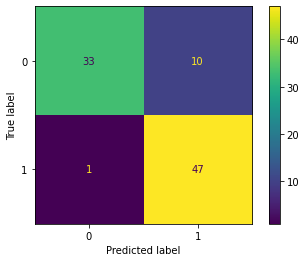

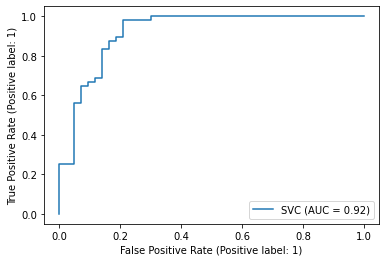

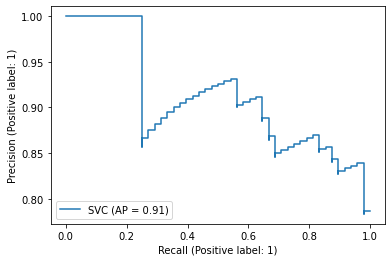

In [86]:
evaluate_performance(svm)

<h3>Interpretation:</h3>
    
From the above performance metrices we can gain the following insights:
    
1. The accuracy_score of SVM model is 88%.
2. The precision_score for positive and negative heart disease cases of SVM model are 84% and 94%.
3. The recall_score for positive and negative heart disease cases of SVM model are 96% and 79%.
4. The f1_score for positive and negative heart disease cases of SVM model are 89% and 86%.
5. From plot confusion matrix we can get the True Positive, True Negative, False Positive and False Negative values as follows: 
34(TP), 46(TN), 9(FP) and 2(FN).
6. The Area under the curve we got from ROC_AUC_ Curve is 91% for SVM model and we can see from this curve that for different thresold values we are getting different confusion metrices with different values of False positive rate (FPR) and True Positive Rate(TPR).
7. The area under the curve of precision_recall_curve for SVM model is 89%.

<h2>4. Decision Trees model</h2>

This is accuracy score for this model: 0.6923076923076923


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.71      0.58      0.64        43
           1       0.68      0.79      0.73        48

    accuracy                           0.69        91
   macro avg       0.70      0.69      0.69        91
weighted avg       0.70      0.69      0.69        91



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

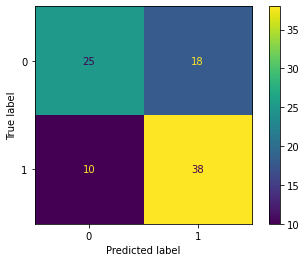

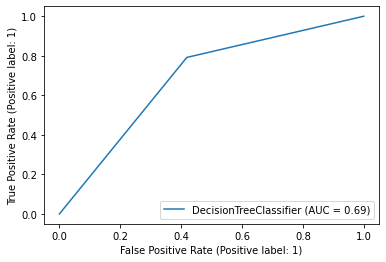

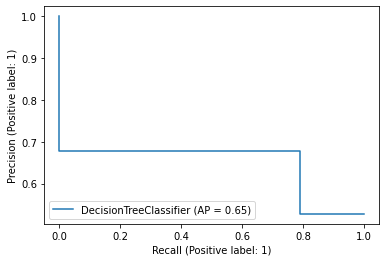

In [87]:
evaluate_performance(dtmodel)

<h3>Interpretation:</h3>
    
From the above performance metrices we can gain the following insights:
    
1. The accuracy_score of Decision Tree model is 76%.
2. The precision_score for positive and negative heart disease cases of Decision Tree model are 76% for each.
3. The recall_score for positive and negative heart disease cases of Decision Tree model are 79% and 72%.
4. The f1_score for positive and negative heart disease cases of Decision Tree model are 78% and 74%.
5. From plot confusion matrix we can get the True Positive, True Negative, False Positive and False Negative values as follows: 
31(TP), 38(TN), 12(FP) and 10(FN).
6. The Area under the curve we got from ROC_AUC_ Curve is 76% for Decision Tree model and we can see from this curve that for different thresold values we are getting different confusion metrices with different values of False positive rate (FPR) and True Positive Rate(TPR).
7. The area under the curve of precision_recall_curve for Decision Tree model is 71%.

<h2>5. Random Forest Model</h2>

This is accuracy score for this model: 0.8021978021978022


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80        43
           1       0.83      0.79      0.81        48

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

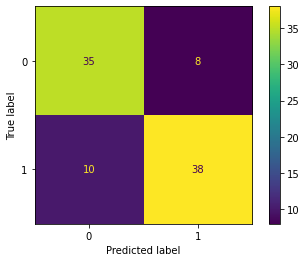

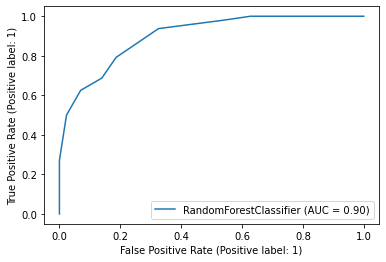

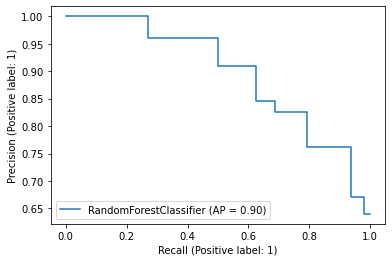

In [88]:
evaluate_performance(rf)

<h3>Interpretation:</h3>
    
From the above performance metrices we can gain the following insights:
    
1. The accuracy_score of Random Forest model is 81%.
2. The precision_score for positive and negative heart disease cases of Random Forest model are 83% and 80%.
3. The recall_score for positive and negative heart disease cases of Random Forest model are 81% for each.
4. The f1_score for positive and negative heart disease cases of Random Forest model are 82% and 80%.
5. From plot confusion matrix we can get the True Positive, True Negative, False Positive and False Negative values as follows: 
35(TP), 39(TN), 8(FP) and 9(FN).
6. The Area under the curve we got from ROC_AUC_ Curve is 90% for Random Forest model and we can see from this curve that for different thresold values we are getting different confusion metrices with different values of False positive rate (FPR) and True Positive Rate(TPR).
7. The area under the curve of precision_recall_curve for Random Forest model is 90%.

<h2>6. Naive-Bayes Model</h2>

This is accuracy score for this model: 0.8791208791208791


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86        43
           1       0.84      0.96      0.89        48

    accuracy                           0.88        91
   macro avg       0.89      0.87      0.88        91
weighted avg       0.89      0.88      0.88        91



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

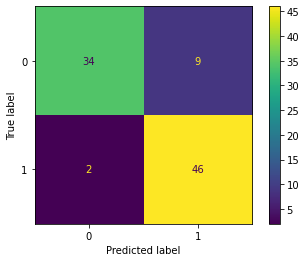

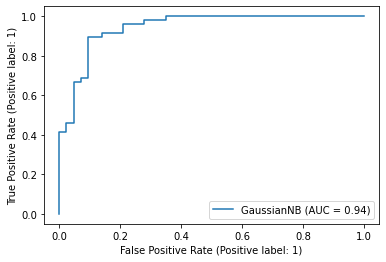

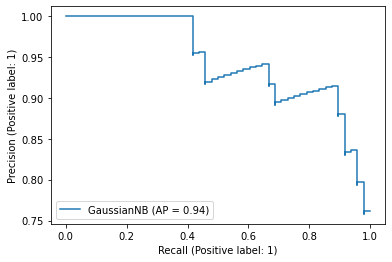

In [89]:
evaluate_performance(nbmodel)

<h3>Interpretation:</h3>
    
From the above performance metrices we can gain the following insights:
    
1. The accuracy_score of Naive-Bayes model is 84%.
2. The precision_score for positive and negative heart disease cases of Naive-Bayes model are 81% and 87%.
3. The recall_score for positive and negative heart disease cases of Naive-Bayes model are 90% and 77%.
4. The f1_score for positive and negative heart disease cases of Naive-Bayes model are 85% and 81%.
5. From plot confusion matrix we can get the True Positive, True Negative, False Positive and False Negative values as follows: 
33(TP), 43(TN), 30(FP) and 5(FN).
6. The Area under the curve we got from ROC_AUC_ Curve is 93% for Naive-Bayes model and we can see from this curve that for different thresold values we are getting different confusion metrices with different values of False positive rate (FPR) and True Positive Rate(TPR).
7. The area under the curve of precision_recall_curve for Naive-Bayes model is 94%.

<H2>Compairing All The Models Used</H2>

We will compare all the models used on the basis of their accuracy score, precision score, f1 score, TP,TN,FP,FN, area under the curve of roc and precision recall curve. After we have compared all the models on the mentioned metrices we'll find a final model which will be most efficient model from the models we have used till now. After we have found our this final model then we will GridSearchCV to see if we can further improve on this model or not.

The given below is the performace values of each values given for comparison:

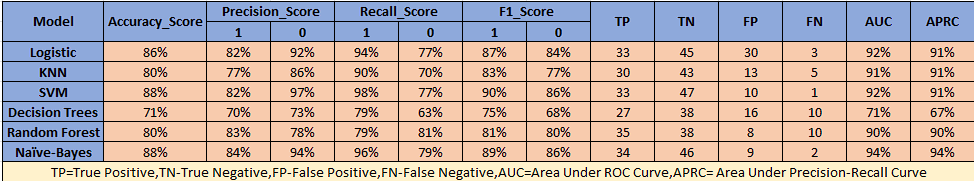

<h2>Conclusion:</h2>

Looking overall values of accuracy score, precision score, f1 score, TP,TN,FP,FN, area under the curve of roc and precision recall curve we conclude that the Support Vecor Machine Classifier is most efficient classifier among all the classifier we have used for classification of whether a person is having a heart disease or not.

<H1>Hyperparamter Tunning using Grid SearchCV</H1>

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [92]:
grid=GridSearchCV(svm,param_grid)

In [93]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [94]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

<h3>Interpretation:</h3>
    
We can observe that for Grid searchCV has taken the value of C to be 0.1 and here 'C' is the number of parameters we are allowing to be within the margin and for the kernel it gives us that 'linear' kernel performs better than the rbf kernel here.

In [95]:
grid.score(scaled_X_test,y_test)

0.8791208791208791

<h3>Interpretation:</h3>
    
The accuracy score with tuned hyperparameter like with linear kernel and c value of 0.1 is 88%.

<h1>Making a Predictive System</h1>

Here we'll take a known point from the given dataset for whose values we know from the label column and for our 1st predictive and check whether our SVM model is predicting correctly or not.

In [96]:
#When the person is not having heart disease

input_data=(64,1,2,125,309,0,1,131,1,1.8,1,0,3)

#We already know the answer that it is not having heart disease lets check how model performs

#Changing data into numpy array
input_data=np.asarray(input_data)

#Reshape the array of input data
input_data=input_data.reshape(1,-1)

#Standarize input data
input_data=scaler.transform(input_data)
print('The input data we got after scaling is this:\n',input_data)

preds2=svm.predict(input_data)

print('\n')
if preds2[0]==1:
    print('The SVM model with linear kernel predicts that the person is having heart disease.\n')
else:
    print('The SVM model with linear kernel predicts that the person is not having the heart disease.\n')

The input data we got after scaling is this:
 [[ 1.03998394  0.70459485  1.00355297 -0.32891218  1.49687066 -0.43057317
   0.87586615 -0.85471647  1.41925534  0.63991658 -0.6238156  -0.79696973
   1.13783702]]


The SVM model with linear kernel predicts that the person is not having the heart disease.



<h3>Interpretation:</h3>
    
<i>We can clearly observe that Support Vector Machines with linear kernel is predicting that our data point is without heart disease which is correct since we have taken that point which was in given dataset and was not having heart disease.</i>

<h2>Predicting a new patient with new set of data</h2>

In [97]:
#input data for new patient
input_data=(54,0,4,130,300,1,2,140,0,2.0,3,1,3)

#Changing data into numpy array
input_data=np.asarray(input_data)

#Reshape the array of input data
input_data=input_data.reshape(1,-1)

#Standarize input data
input_data=scaler.transform(input_data)
print('The input data we got after scaling is this:\n',input_data)

preds2=svm.predict(input_data)

print('\n')
if preds2[0]==1:
    print('The SVM model with linear kernel predicts that the person is having heart disease.\n')
else:
    print('The SVM model with linear kernel predicts that the person is not having the heart disease.\n')

The input data we got after scaling is this:
 [[-0.04472496 -1.41925534  2.93733996 -0.0402247   1.2880119   2.32248561
   2.74261118 -0.43987555 -0.70459485  0.81607104  2.62618668  0.43048
   1.13783702]]


The SVM model with linear kernel predicts that the person is having heart disease.



<h3>Interpretation:</h3>
    
<i>We can clearly observe that Support Vector Machines with linear kernel is predicting that our new data point with certain set of data values is having heart disease.</i>